# <center>Trends in Financial Data Science HW3</center>

### <center>ICA, Gaussian Process, Fama-French 5 factor model, HMMs and jump models</center>

&copy; 2023 Kaiwen Zhou (kz1266), Youran Pan (yp1172), Erding Liao (el2911)

## Q1 Topic: Random Feature Maps

Given a set of functions of a single variable $\left\{\phi_{i}(t)\right\}_{i=1}^{M}$ and discrete observations $\left(t_{j}\right)_{j=1}^{N}$, one can form both the $N \times M$ design matrix $\boldsymbol{\Phi} = \left[\Phi_{ji}\right] := \left[\phi_{i}(t_{j})\right]$ and the $N \times N$ kernel $\mathbf{K} = \left[K(t_{j}, t_{l})\right] := \boldsymbol{\Phi} \boldsymbol{\Phi}^\top$. As we will see in later lectures, often $M \gg N$ and in fact in most cases $M = \infty$ (e.g., Fourier series). In this exercise, we will consider random feature map functions.

$$
\boldsymbol{\Phi} := \begin{bmatrix}
  \phi_1(t_1) & \cdots & \phi_{M}(t_1) \\
  \vdots & \ddots & \vdots \\
  \phi_1(t_N) & \cdots & \phi_{M}(t_N)
\end{bmatrix} \in \mathbb{R}^{N \times M}
$$

1. **Suppose $\phi_{i}(t_{j})$ are simply white noise vectors, e.g., each entry in the design matrix is an i.i.d. realization of random mean zero Gaussian with variance 1. In this case, one can think of each feature map $\phi_{\mathbf{w}_i} := \left(\phi_i(t_{1}), \ldots, \phi_i(t_{N})\right) \equiv \mathbf{w}_i$ as a random constant vector function taking a value $\mathbf{w}_i$. Because one is drawing $M$ such random vectors, the feature maps are $M$ random vector-valued constant functions. Construct the kernel matrix and find its eigenvectors and eigenvalues. For fixed $N=100$, plot the histogram of the eigenvalues of $\mathbf{K}$ as a function of $q = M / N$ for $M = 10, 100, 1000$. Plot the top 3 eigenvectors in each case.**

In [18]:
import numpy as np
import matplotlib.pyplot as plt

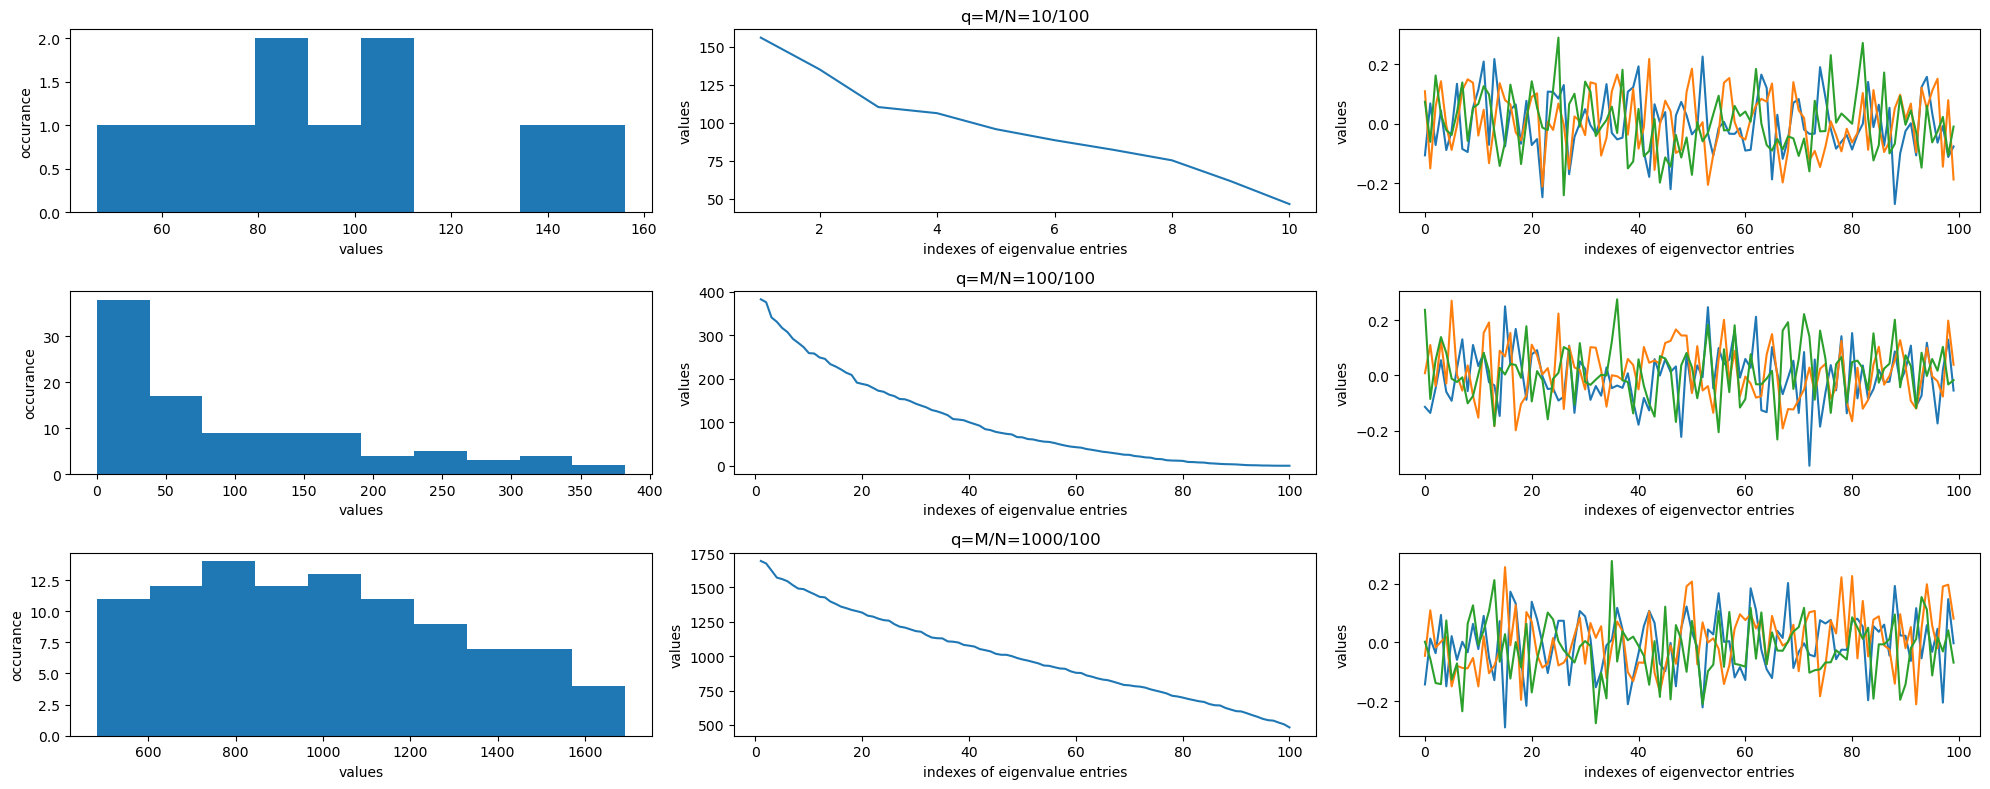

In [417]:
np.random.seed(42)

N = 100

fig, axs = plt.subplots(3, 3, figsize=(20, 8))

for i, M in enumerate([10, 100, 1000]):
    
    # construct the design matrix
    Phi = np.random.normal(0, 1, (N, M))
    
    U, S, Vt = np.linalg.svd(Phi)
    eigvals = S**2
    eigvecs = U
    
    # PLOTS
    axs[i, 0].hist(eigvals)
    axs[i, 0].set_ylabel('occurance')
    axs[i, 0].set_xlabel('values')
    
    axs[i, 1].plot(np.arange(1, len(eigvals)+1), eigvals)
    axs[i, 1].set_ylabel('values')
    axs[i, 1].set_xlabel('indexes of eigenvalue entries')
    axs[i, 1].set_title(f'q=M/N={M}/{N}')
    
    axs[i, 2].plot(np.arange(len(U[0])),U[0])
    axs[i, 2].plot(np.arange(len(U[0])),U[1])
    axs[i, 2].plot(np.arange(len(U[0])),U[2])
    axs[i, 2].set_ylabel('values')
    axs[i, 2].set_xlabel('indexes of eigenvector entries')
fig.tight_layout()

2. **Repeat (a), but this time assume $\phi_{i}(t_{j})$ is a random draw of discretized Brownian motion paths evaluated at $t_{j} = (j / N)_{j=0}^{N} \in [0,1)$. Each feature map is therefore the cumulative sum of Brownian increments, where the Gaussian has zero mean and a variance of $1 / N$. Do you see any structure in the top three eigenvectors of the kernel matrix resulting from this Brownian motion design matrix? Empirically, how fast does the spectrum of the $n$-th eigenvalue decay as a function of $n$ for each of the values of $q$ in (a)?**

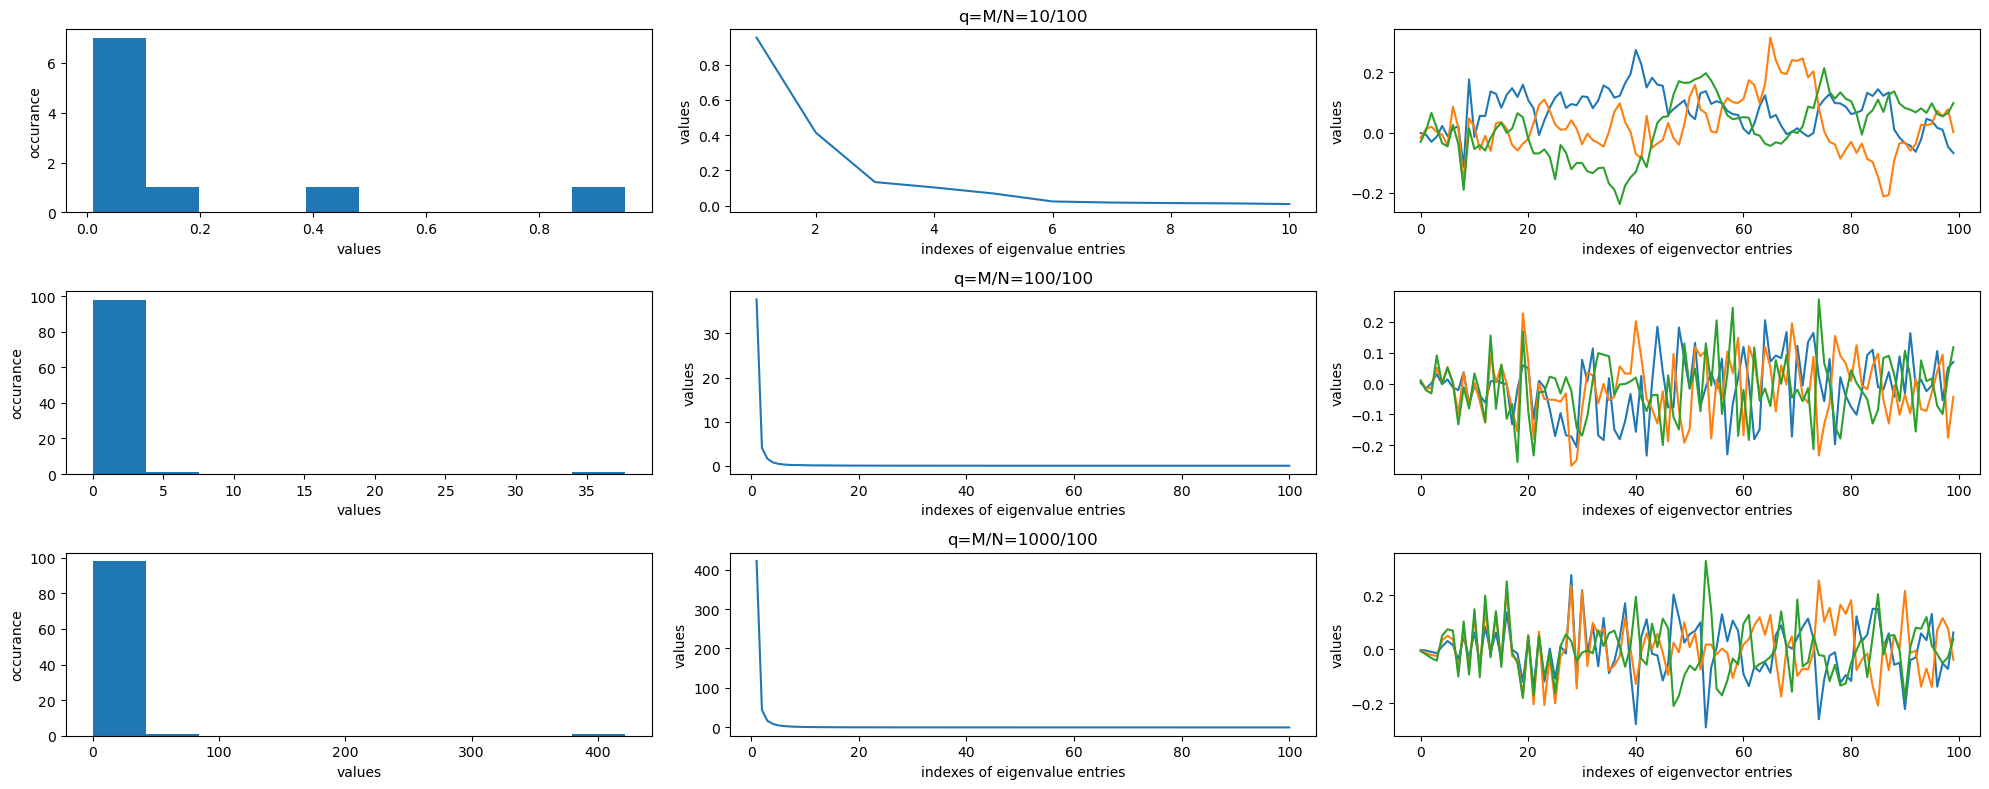

In [418]:
np.random.seed(42)

N = 100
delta = 1/N

fig, axs = plt.subplots(3, 3, figsize=(20, 8))

for i, M in enumerate([10, 100, 1000]):
    
    # construct the design matrix
    gaussian_increments = np.random.normal(0, delta, (N, M))
    Phi = np.cumsum(gaussian_increments, axis=0)
    
    U, S, Vt = np.linalg.svd(Phi)
    eigvals = S**2
    eigvecs = U
    
    # PLOTS
    axs[i, 0].hist(eigvals)
    axs[i, 0].set_ylabel('occurance')
    axs[i, 0].set_xlabel('values')
    
    axs[i, 1].plot(np.arange(1, len(eigvals)+1), eigvals)
    axs[i, 1].set_ylabel('values')
    axs[i, 1].set_xlabel('indexes of eigenvalue entries')
    axs[i, 1].set_title(f'q=M/N={M}/{N}')
    
    axs[i, 2].plot(np.arange(len(U[0])),U[0])
    axs[i, 2].plot(np.arange(len(U[0])),U[1])
    axs[i, 2].plot(np.arange(len(U[0])),U[2])
    axs[i, 2].set_ylabel('values')
    axs[i, 2].set_xlabel('indexes of eigenvector entries')
fig.tight_layout()

**Findings:**

- **For the top three eigenvectors, as $q$ increases from $0.1, 1$ to $10$, the amount of entries of the eighenvectors that are similar starting from the first entry increases.**

- **Empirically, the spectrum of the $n$-th eigenvalue decay quicker, almost exponentially, as a function of $n$ for each of the values of $q$ in (a).**

3. **Investigate the stability of your results in (a) and (b) to resampling of your random feature maps. Which aspects appear stable and which aspects do not? Explain your findings.**

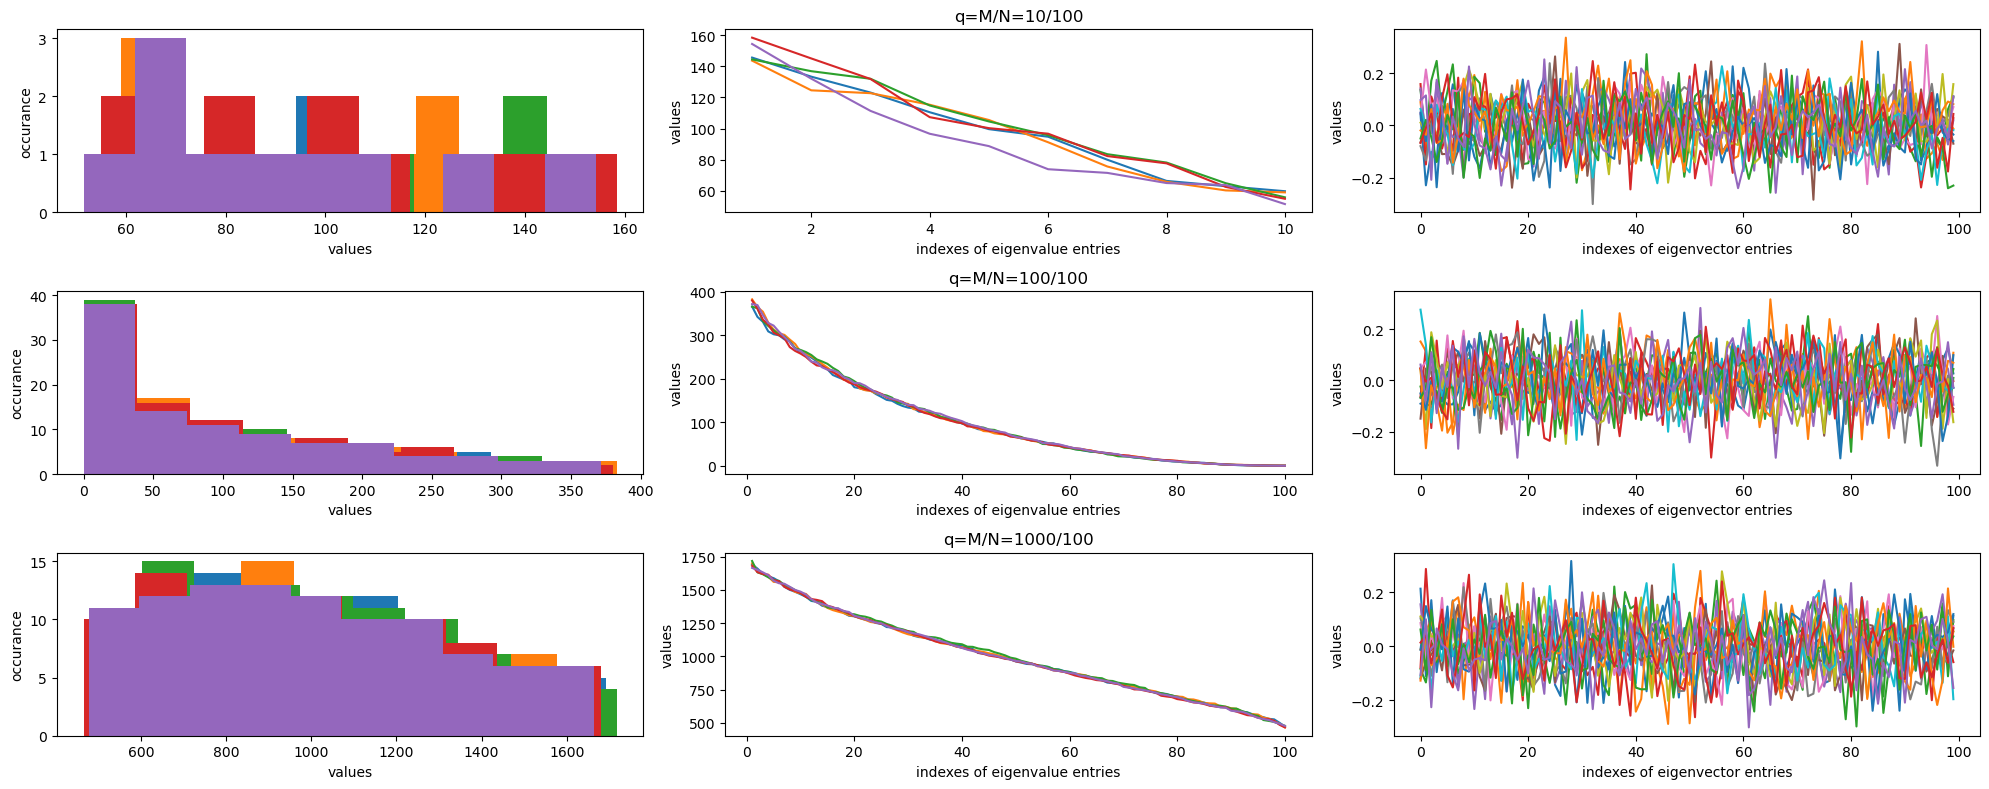

In [419]:
fig, axs = plt.subplots(3, 3, figsize=(20, 8))

for seed in range(5):
    np.random.seed(seed)

    N = 100

    

    for i, M in enumerate([10, 100, 1000]):

        # construct the design matrix
        Phi = np.random.normal(0, 1, (N, M))

        U, S, Vt = np.linalg.svd(Phi)
        eigvals = S**2
        eigvecs = U

        # PLOTS
        axs[i, 0].hist(eigvals)
        axs[i, 0].set_ylabel('occurance')
        axs[i, 0].set_xlabel('values')

        axs[i, 1].plot(np.arange(1, len(eigvals)+1), eigvals)
        axs[i, 1].set_ylabel('values')
        axs[i, 1].set_xlabel('indexes of eigenvalue entries')
        axs[i, 1].set_title(f'q=M/N={M}/{N}')

        axs[i, 2].plot(np.arange(len(U[0])),U[0])
        axs[i, 2].plot(np.arange(len(U[0])),U[1])
        axs[i, 2].plot(np.arange(len(U[0])),U[2])
        axs[i, 2].set_ylabel('values')
        axs[i, 2].set_xlabel('indexes of eigenvector entries')
fig.tight_layout()

**(a)** 
- **The distribution of eigenvalues is stable.**
- **The corresponding eigenvectors are not stable.**

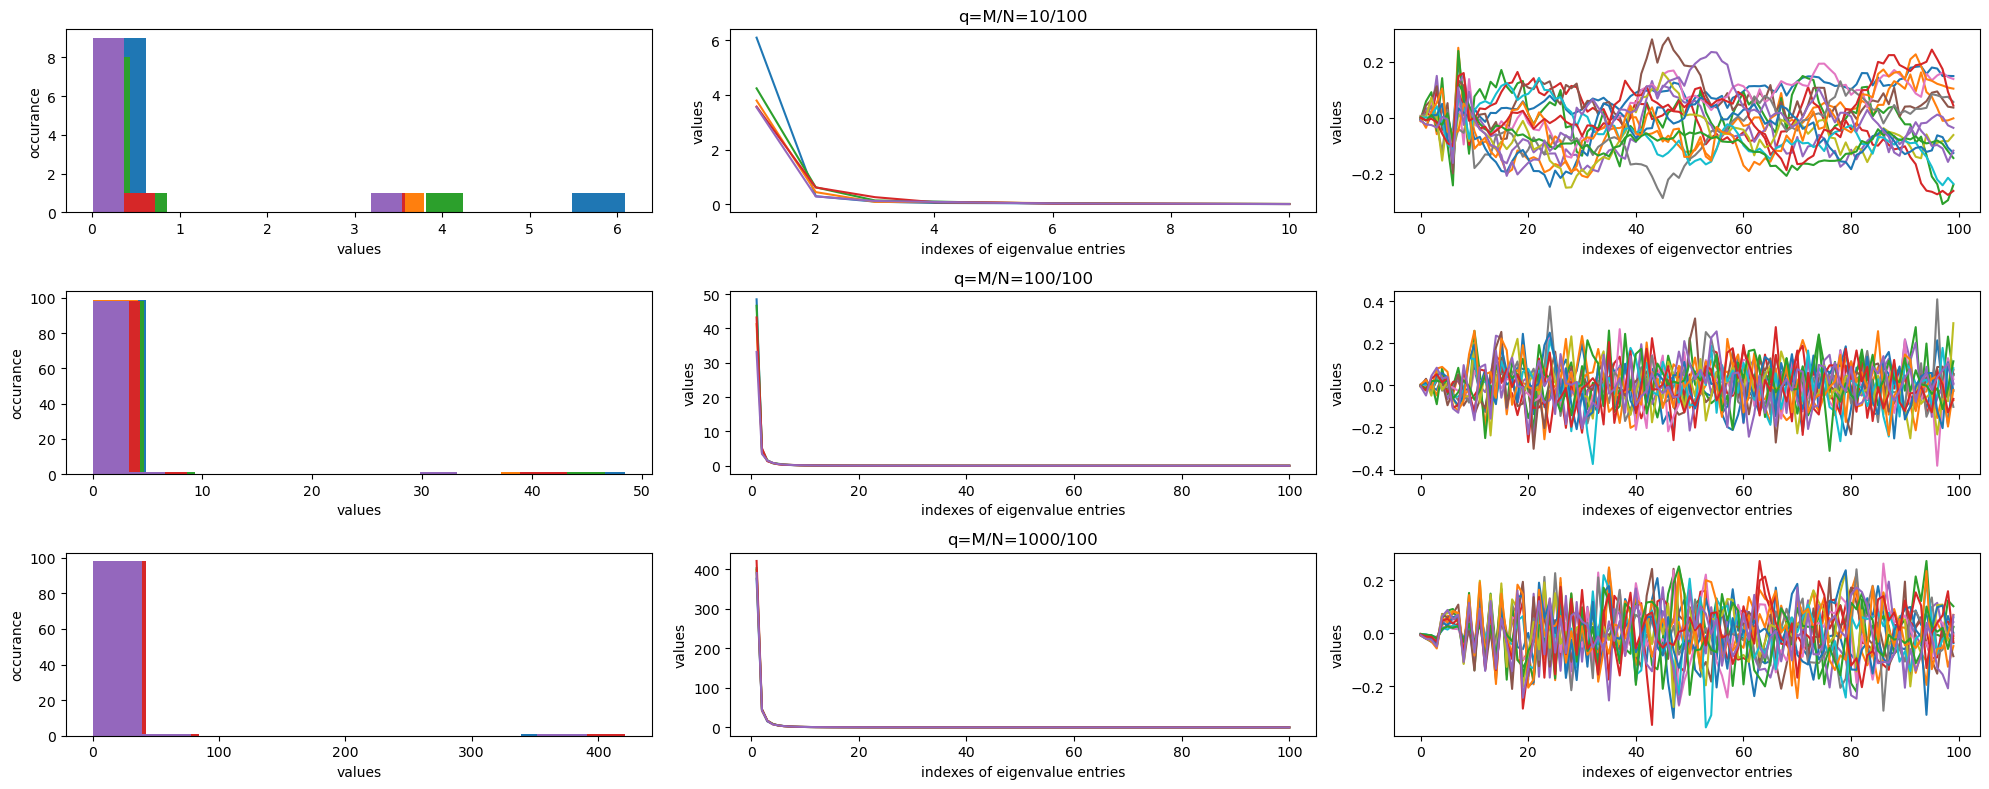

In [420]:
fig, axs = plt.subplots(3, 3, figsize=(20, 8))

for seed in range(5):
    np.random.seed(seed)
    N = 100
    delta = 1/N

    for i, M in enumerate([10, 100, 1000]):

        # construct the design matrix
        gaussian_increments = np.random.normal(0, delta, (N, M))
        Phi = np.cumsum(gaussian_increments, axis=0)

        U, S, Vt = np.linalg.svd(Phi)
        eigvals = S**2
        eigvecs = U

        # PLOTS
        axs[i, 0].hist(eigvals)
        axs[i, 0].set_ylabel('occurance')
        axs[i, 0].set_xlabel('values')

        axs[i, 1].plot(np.arange(1, len(eigvals)+1), eigvals)
        axs[i, 1].set_ylabel('values')
        axs[i, 1].set_xlabel('indexes of eigenvalue entries')
        axs[i, 1].set_title(f'q=M/N={M}/{N}')

        axs[i, 2].plot(np.arange(len(U[0])),U[0])
        axs[i, 2].plot(np.arange(len(U[0])),U[1])
        axs[i, 2].plot(np.arange(len(U[0])),U[2])
        axs[i, 2].set_ylabel('values')
        axs[i, 2].set_xlabel('indexes of eigenvector entries')
fig.tight_layout()

**(b)** 
- **The distribution of eigenvalues is stable.**
- **The corresponding eigenvectors are stable in the sense that the first few entries are indifferent to resampling.**

## Q2 Topic: Brownian Motion and Brownian Bridge Gaussian Processes (GPs)

In class we suggested that both the Brownian motion

$$
y_{t}=\int_{0}^{t} d W_{t} \tag{1}
$$

and the Brownian bridge stochastic process

$$
y_{t}=\int_{0}^{t} d W_{t}, \quad \text{where} \ t \leq 1 \text{ and } y(1)=0 \tag{2}
$$

can be thought of as GPs.

1. **Prove that the kernel of (1) is** $ K_{\mathrm{BM}}\left(t, t^{\prime}\right)=\min \left(t, t^{\prime}\right) $ **and that the kernel of (2) is** $ K_{\mathrm{BB}}\left(t, t^{\prime}\right)=\min \left(t, t^{\prime}\right)-t t^{\prime} $.

    **Solution:** WLOG, suppose $ t'\le t $.

    - **The Kernel of a Brownian Motion:** By the assumption above, $ W(t') $ and $ W(t)-W(t') $ are independent, we have

        $$
        \begin{align*}
        K_{\mathrm{BM}}\left(t, t^{\prime}\right) &= \mathbb{E}[W(t')W(t)] \\
        &= \mathbb{E}[W(t')(W(t)-W(t'))+W(t')^2] \\
        &= \mathbb{E}[W(t')]\cdot\mathbb{E}[W(t)-W(t')]+\mathbb{E}[W(t')^2] \\
        &= 0 + \text{Var}[W(t')] \\
        &= t' \\
        \text{by symmetry} \Longrightarrow &= \min(t',t).
        \end{align*}
        $$

    - **The Kernel of a Brownian Bridge:** A Brownian bridge $ X(t) $ from 0 to 0 over $[0, T]$ can be expressed as: $ X(t) = W(t) - \frac{t}{T}\cdot W(T), \quad 0\le t\le T $. where $ W(t) $ is a Brownian motion. For this question in particular, setting $ T=1 $, we have $ X(t) = W(t) - t\cdot W(1) $, $ 0\le t\le 1 $.

        By the definition of a kernel, we have

        $$
        \begin{align*}
        K_{\mathrm{BB}}\left(t, t^{\prime}\right) &= \mathbb{E}[(W(t) - t\cdot W(1))(W(t') - t'\cdot W(1))] \\
        &= \mathbb{E}[W(t)W(t') - tW(1)W(t') - t'W(1)W(t) + tt'W(1)W(1)] \\
        &= \min(t',t) - t\min(t',1) - t'\min(1,t) + tt'\cdot \min(1,1) \\
        0 \le t' \le t \le 1 \Longrightarrow &= \min(t',t) - tt'
        \end{align*}
        $$

2. **Implement the kernels (1) and (2) in Scikit-Learn (e.g., see the kernels they currently have implemented and inherit from the kernel class) and show that paths generated using (1) have properties of Brownian motion paths, while those generated using (2) have properties of a Brownian bridge. Plot 100 paths generated from the priors of each model.**

In [259]:
from sklearn.gaussian_process.kernels import Kernel, StationaryKernelMixin, NormalizedKernelMixin

# Construct the Brownian Motion Kernel
class BrownianMotionKernel(StationaryKernelMixin, NormalizedKernelMixin, Kernel):
    def __init__(self):
        pass
    
    def __call__(self, X, Y=None):
        """Compute the Brownian Motion Kernel"""
        if Y is None:
            Y = X
            
        t = np.outer(X, np.ones_like(Y))
        t_prime = np.outer(np.ones_like(X), Y)
        K = np.minimum(t, t_prime)
        return K
    
    def is_stationary(self):
        """Returns whether the kernel is stationary."""
        return False

    
# Construct the Brownian Bridge Kernel
class BrownianBridgeKernel(StationaryKernelMixin, NormalizedKernelMixin, Kernel):
    def __init__(self):
        pass
    
    def __call__(self, X, Y=None):
        """Compute the Brownian Bridge Kernel"""
        if Y is None:
            Y = X
        
        t = np.outer(X, np.ones_like(Y))
        t_prime = np.outer(np.ones_like(X), Y)
        K = np.minimum(t, t_prime) - t * t_prime
        return K
    
    def is_stationary(self):
        """Returns whether the kernel is stationary."""
        return False

In [260]:
from sklearn.gaussian_process import GaussianProcessRegressor

N = 100

# Time steps we want to evaluate the stochastic process at
time_steps = np.atleast_2d(np.linspace(0, 1, N)).T

# Instantiate Gaussian process regressors using the custom kernels
gp_bm = GaussianProcessRegressor(kernel=BrownianMotionKernel())
gp_bb = GaussianProcessRegressor(kernel=BrownianBridgeKernel())

# Sample paths from the Gaussian processes
bm_paths = gp_bm.sample_y(time_steps, n_samples=100)
bb_paths = gp_bb.sample_y(time_steps, n_samples=100)

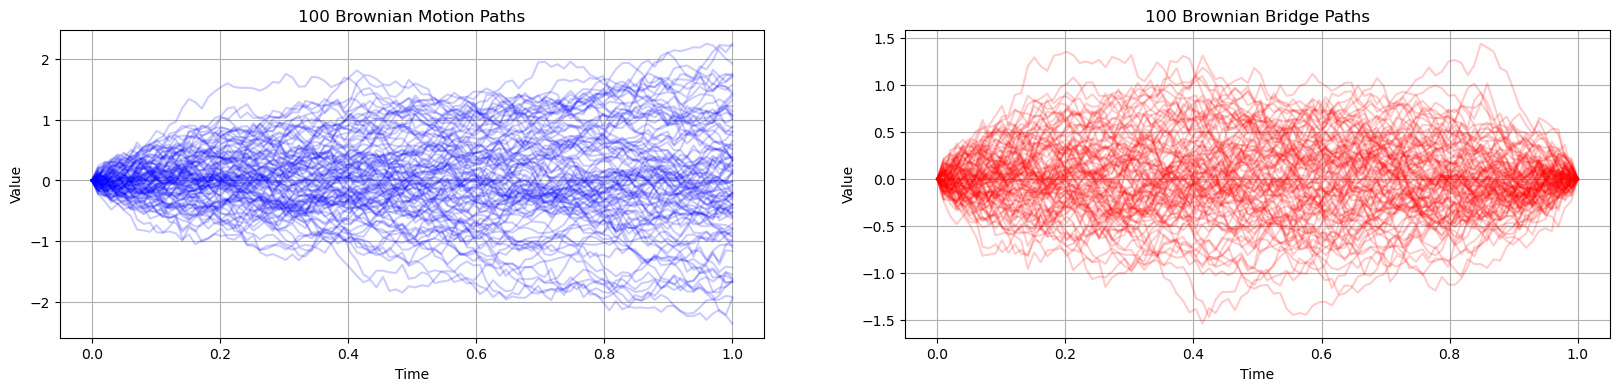

In [261]:
###############################################
### PLOTS
fig, axs = plt.subplots(1, 2, figsize=(20, 4))

# Brownian motion paths
for i in range(bm_paths.shape[1]):
    axs[0].plot(time_steps, bm_paths[:, i], "b", alpha=0.2)
axs[0].set_title('100 Brownian Motion Paths')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')
axs[0].grid(True)

# Brownian bridge paths
for i in range(bb_paths.shape[1]):
    axs[1].plot(time_steps, bb_paths[:, i], "r", alpha=0.2)
axs[1].set_title('100 Brownian Bridge Paths')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')
axs[1].grid(True)

According to the plots of 100 paths generated from Brownian motion and Brownian bridge above, we can clearly see that:

$\textbf{Brownian motion}$:
- Starting at Zero: All paths should and have already started at zero because Brownian motion is defined to start at $B(0) = 0$;
- Independent Increments: The increments between any two points on a path should be independent, we can look for the absence of visible "trends" or systematic patterns in the increments;
- Normally Distributed Increments: The increments should be normally distributed;
- Continuous Paths: The paths should and have already been continuous with no jumps, which is evident in the plots.

$\textbf{Brownian bridge}$:
- Starting and Ending at Zero: All paths should start and end at zero because a Brownian bridge is defined to return to zero at the end of the time interval;
- Dependent Increments: Unlike Brownian motion, the increments of a Brownian bridge are not independent because the condition that the path must return to zero at the end of the interval induces a correlation between the increments;
- Normally Distributed Increments with Drift: The increments will still be normally distributed, but they will have a "drift" that pulls the path back towards zero. The farther the path is from zero, the stronger this drift will be;
- Conditioning on the End Points: The Brownian bridge can be thought of as a Brownian motion that has been "conditioned" on the fact that it ends at zero. Visually, this means that as we approach the end of the time interval, the paths should converge towards zero in our case.

3. **Brownian bridge can be thought of as Brownian motion conditioned to pass through $ y(1)=0 $. Within the GP framework, one should therefore be able to simulate Brownian bridge paths using the posterior density corresponding to the Brownian motion kernel (1), conditioned on a single training point $ (t, y)=(1,0) $.**

- **Using the GP formula for the posterior density as a function of the kernel in (1), show that for a single training point $ (t, y)=(1,0) $, it corresponds to sampling from the distribution $ \mathcal{N}\left(0, K_{\mathrm{BB}}\left(t, t^{\prime}\right)\right) $.**

**Proof:**

The GP formula for the posterior density is given by

\begin{align*}
\mathbb{E}\left[\mathbf{y}_{*} \mid \mathbf{X}_{*}, \mathbf{y}, \mathbf{X}\right] & =K\left(\mathbf{X}_{*}, \mathbf{X}\right)\left[K(\mathbf{X}, \mathbf{X})+\sigma^{2} \mathbf{I}\right]^{-1} \mathbf{y} \\
\operatorname{Cov}\left[\mathbf{y}_{*} \mid \mathbf{X}_{*}, \mathbf{y}, \mathbf{X}\right] & =K\left(\mathbf{X}_{*}, \mathbf{X}_{*}\right)-K\left(\mathbf{X}_{*}, \mathbf{X}\right)\left[K(\mathbf{X}, \mathbf{X})+\sigma^{2} \mathbf{I}\right]^{-1} K\left(\mathbf{X}, \mathbf{X}_{*}\right)
\end{align*}

Plug in $\sigma = 0$, $\mathbf{X}_{*} = \mathbf{t}$, $\mathbf{X} = \begin{bmatrix}1\end{bmatrix}$, $\mathbf{y} = \begin{bmatrix}0\end{bmatrix}$ and $K = K_{\mathrm{BM}}$, we obtain

\begin{align*}
\mathbb{E}\left[\mathbf{y}_{*} \mid \mathbf{X}_{*}, \mathbf{y}, \mathbf{X}\right] & =K\left(\mathbf{t}, \begin{bmatrix}1\end{bmatrix}\right)\left[K(\begin{bmatrix}1\end{bmatrix}, \begin{bmatrix}1\end{bmatrix})+0^{2} \mathbf{I}\right]^{-1} \begin{bmatrix}0\end{bmatrix} = 0\\
\operatorname{Cov}\left[\mathbf{y}_{*} \mid \mathbf{X}_{*}, \mathbf{y}, \mathbf{X}\right] & =K\left(\mathbf{t}, \mathbf{t}\right)-K\left(\mathbf{t}, \begin{bmatrix}1\end{bmatrix}\right)\left[K(\begin{bmatrix}1\end{bmatrix}, \begin{bmatrix}1\end{bmatrix})+0^{2} \mathbf{I}\right]^{-1} K\left(\begin{bmatrix}1\end{bmatrix}, \mathbf{t}\right) = K\left(\mathbf{t}, \mathbf{t}\right) - \mathbf{t}\mathbf{t}^\top = K_{\mathrm{BB}}(\mathbf{t}, \mathbf{t})
\end{align*}
Hence, we have
$$
\mathbf{y}_{*} \mid \mathbf{X}_{*}, \mathbf{y}, \mathbf{X} \sim \mathcal{N}\left(\boldsymbol{0}, K_{\mathrm{BB}}\left(\mathbf{t}, \mathbf{t}\right)\right)
$$
Therefore, for a single training point $ (t, y)=(1,0) $, it corresponds to sampling from the distribution $ \mathcal{N}\left(0, K_{\mathrm{BB}}\left(t, t^{\prime}\right)\right)$.


- **Plot 100 paths of the posterior density of Brownian Motion trained on $ (t, y)=(1,0) $.**

In [219]:
N = 100

X_train = np.array([[1.0]])
y_train = np.array([[0.0]])

gp_bm = GaussianProcessRegressor(kernel=BrownianMotionKernel())

# Condition the Process on the Training Point
# Use floats for the training data
gp_bm.fit(X_train, y_train)

# Generate and Plot Paths from the Posterior Distribution
time_steps = np.atleast_2d(np.linspace(0, 1, N)).T

# Generate sample paths
sample_paths = gp_bm.sample_y(time_steps, n_samples=100)

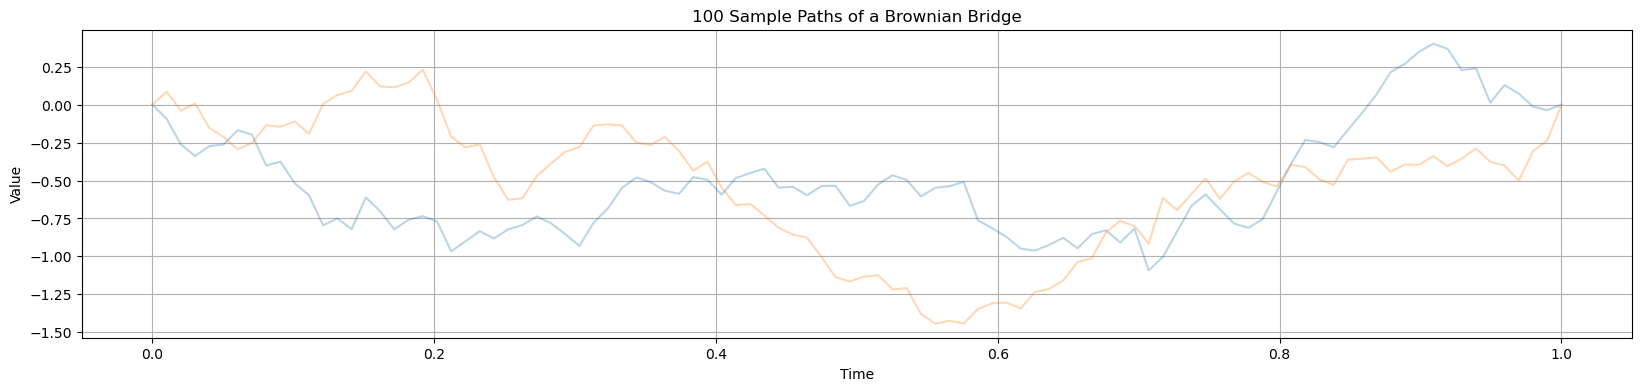

In [218]:
# Plotting
plt.figure(figsize=(20, 4))
for i in range(sample_paths.shape[1]):
    plt.plot(time_steps, sample_paths[:, i], alpha=0.3)
plt.title('100 Sample Paths of a Brownian Bridge')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

**Sanity Check: The processes above should look similar to the one generated using the prior of the Brownian Bridge Kernel.**

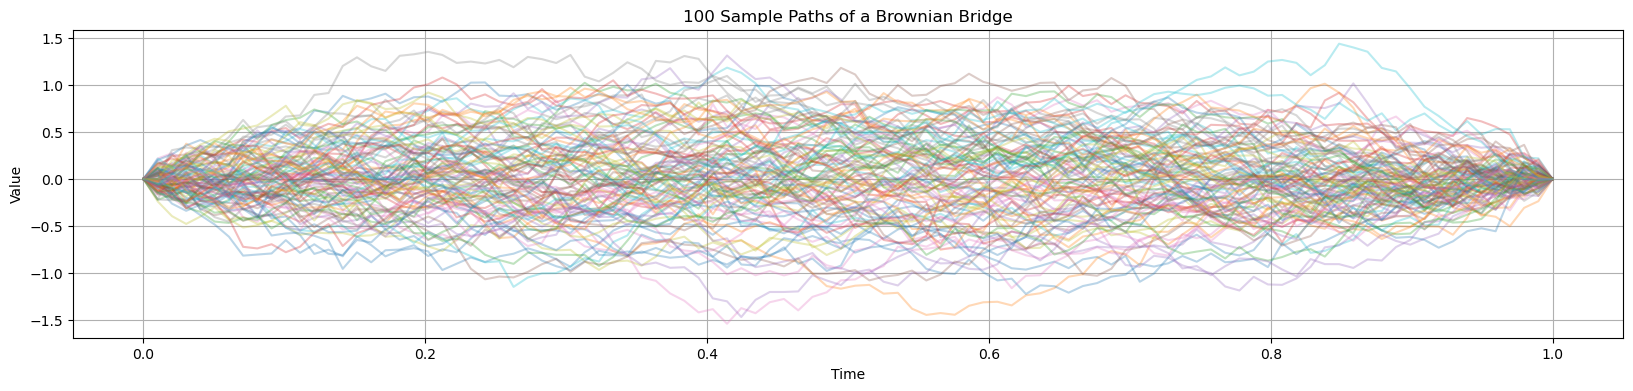

In [212]:
gp_bb = GaussianProcessRegressor(kernel=BrownianBridgeKernel())

# Generate and Plot Paths from the Posterior Distribution
time_steps = np.atleast_2d(np.linspace(0, 1, N)).T

# Generate sample paths
sample_paths = gp_bb.sample_y(time_steps, n_samples=N)

# Plotting
plt.figure(figsize=(20, 4))
for i in range(sample_paths.shape[1]):
    plt.plot(time_steps, sample_paths[:, i], alpha=0.3)
plt.title('100 Sample Paths of a Brownian Bridge')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Q3 Topic: Applying HMMs and Jump Models to Equity Factors

The deliverables for this homework are: 

1. One Python notebook (that will read in all the data needed and then does all necessary calculations),
2. All data files you use. Make sure to comment and annotate your steps in the notebook clearly.

[Download](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip) the daily Fama-French 5-factor model (FF5M). A description of the factors is [available here](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html). You will be using Mkt-RF, SMB, HML, RMW, and CMA for the time period 2010/01/04 through 2023/09/29.

Create one notebook with all your code, analysis, and answers to the following questions:

In [288]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import hmmlearn.hmm as hmm
from datetime import datetime

path = "F-F_Research_Data_5_Factors_2x3_daily.csv"

**a. Briefly describe how the 5 time series from FF5M have been constructed.**

In [321]:
# read and format the csv
df = pd.read_csv(path, skiprows=3, index_col='Unnamed: 0')
df.index = pd.to_datetime(df.index, format='%Y%m%d')
df = df[ (datetime.strptime('20100104', '%Y%m%d') <= df.index) & (df.index <= datetime.strptime('20230929', '%Y%m%d')) ]
df = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
df

Mkt-RF   SMB   HML   RMW   CMA
2010-01-04    1.69  0.79  1.13 -0.17  0.21
2010-01-05    0.31 -0.41  1.24 -0.19  0.19
2010-01-06    0.13 -0.13  0.57 -0.05  0.20
2010-01-07    0.40  0.25  0.98 -0.69  0.22
2010-01-08    0.33  0.32  0.01  0.22 -0.37
...            ...   ...   ...   ...   ...
2023-09-25    0.39 -0.07  0.35  0.59 -0.46
2023-09-26   -1.46  0.35 -0.50 -0.36 -0.08
2023-09-27    0.13  0.78  0.12  0.18 -0.27
2023-09-28    0.65  0.19  0.03  0.43 -0.03
2023-09-29   -0.27 -0.02  0.30 -0.18 -0.15

[3459 rows x 5 columns]

##### Mkt-RF: 
Mkt is the excess return of the market over the risk-free rate. It represents the additional return investors expect for taking on the higher risk of investing in the stock market compared to risk-free assets like government bonds.


##### SMB: 
This factor represents the excess return of small-cap stocks over large-cap stocks. Historically, small-cap stocks have outperformed large-cap stocks, and this factor aims to capture that premium. SMB measures though growth, robustness, and aggressiveness of small/large stocks, and for each feature it uses the subtraction of averages of small to large.


##### HML: 
HML measures the excess return of value stocks over growth stocks. For value stocks and growth stocks it calculates the average between small/large stocks and takes their differentiation.


##### RMW: 
RMW represents the excess return of stocks with high operating profitability over those with low operating profitability.


##### CMA: 
CMA represents the excess return of conservative stocks over aggressive stocks.

**b. Produce a table of average return, volatility, and correlations of the FF5M time series. Returns and volatilities should be annualized.**

In [322]:
# annualized mean return and volatility of factors
avg_rtn = df.mean() * 252
vol = df.std() * np.sqrt(252)
corr_factor = df.corr()

annualized_vol_rtn = pd.DataFrame({"Annualized Average Return": avg_rtn, "Annualized volatility": vol})
pd.concat([annualized_vol_rtn, corr_factor], axis=1)

Annualized Average Return  Annualized volatility    Mkt-RF       SMB  \
Mkt-RF                  12.506748              18.072204  1.000000  0.271473   
SMB                     -0.342411               9.789803  0.271473  1.000000   
HML                     -1.780538              12.468809  0.019654  0.213588   
RMW                      3.259462               7.424072 -0.282583 -0.289550   
CMA                      0.966036               6.426120 -0.223809  0.002920   

             HML       RMW       CMA  
Mkt-RF  0.019654 -0.282583 -0.223809  
SMB     0.213588 -0.289550  0.002920  
HML     1.000000  0.228198  0.611504  
RMW     0.228198  1.000000  0.253153  
CMA     0.611504  0.253153  1.000000

**c. Compute and plot cumulative daily returns and volatilities for the 5 time series as in the top half of Exhibit 10 in "Greedy Online Classification of Persistent Market States Using Realized Intraday Volatility Features" by Nystrup, Kolm, and Lindström covered in one of the lectures. The result for Mkt-RF will be similar to the S&P500 used in the exhibit.**

In [323]:
cum_return = (1 + df/100).cumprod() - 1
cum_return

Mkt-RF       SMB       HML       RMW       CMA
2010-01-04  0.016900  0.007900  0.011300 -0.001700  0.002100
2010-01-05  0.020052  0.003768  0.023840 -0.003597  0.004004
2010-01-06  0.021378  0.002463  0.029676 -0.004095  0.006012
2010-01-07  0.025464  0.004969  0.039767 -0.010967  0.008225
2010-01-08  0.028848  0.008185  0.039871 -0.008791  0.004495
...              ...       ...       ...       ...       ...
2023-09-25  3.485888 -0.118079 -0.295661  0.505183  0.115797
2023-09-26  3.420394 -0.114992 -0.299182  0.499764  0.114904
2023-09-27  3.426140 -0.108089 -0.298341  0.502464  0.111894
2023-09-28  3.454910 -0.106395 -0.298131  0.508924  0.111560
2023-09-29  3.442882 -0.106573 -0.296025  0.506208  0.109893

[3459 rows x 5 columns]

<Axes: title={'center': 'Cumulative Returns of Fama-French 5 Factors'}, xlabel='dates', ylabel='cumulative daily returns'>

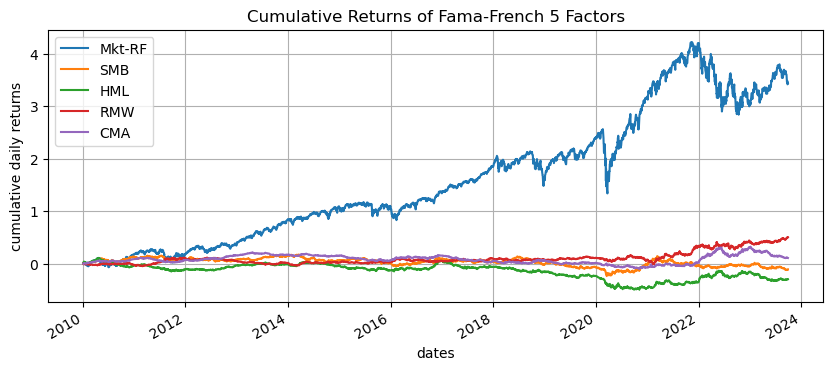

In [325]:
############################################
### PLOTS
cum_return.plot(xlabel='dates', ylabel='cumulative daily returns', figsize=(10,4), grid=True, title='Cumulative Returns of Fama-French 5 Factors')

In [369]:
annualized_vol = df.rolling(window=6).std() * np.sqrt(252)
annualized_vol

Mkt-RF       SMB       HML       RMW       CMA
2010-01-04        NaN       NaN       NaN       NaN       NaN
2010-01-05        NaN       NaN       NaN       NaN       NaN
2010-01-06        NaN       NaN       NaN       NaN       NaN
2010-01-07        NaN       NaN       NaN       NaN       NaN
2010-01-08        NaN       NaN       NaN       NaN       NaN
...               ...       ...       ...       ...       ...
2023-09-25  11.733577  5.919652  5.549270  2.819532  5.503366
2023-09-26  12.690773  3.498760  6.506160  5.461769  5.532367
2023-09-27  13.613042  5.487163  6.552154  5.439577  5.371514
2023-09-28  15.574637  5.122328  6.269124  5.593596  3.289766
2023-09-29  11.771031  5.330621  6.028691  5.686014  2.444365

[3459 rows x 5 columns]

<Axes: title={'center': 'Annualized Volatility (7-days window) of Fama-French 5 Factors'}, xlabel='dates', ylabel='annulized volatility'>

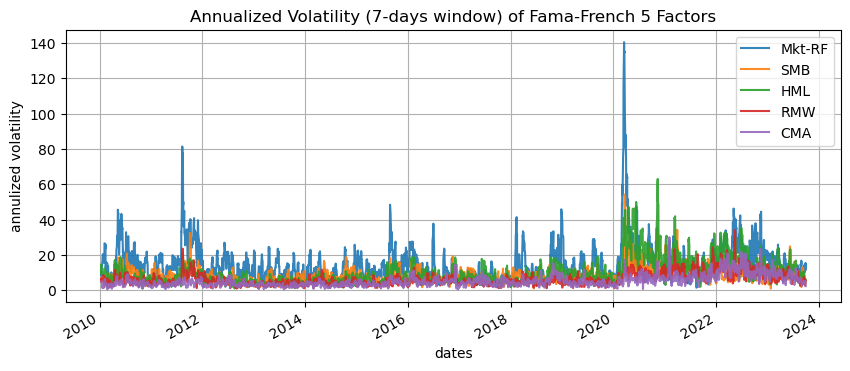

In [370]:
############################################
### PLOTS
annualized_vol.plot(xlabel='dates', ylabel='annulized volatility', figsize=(10,4), grid=True, title='Annualized Volatility (7-days window) of Fama-French 5 Factors', alpha=0.9)

**d. For each time series, compare the hidden states inferred from hmmlearn (fits an HMM) and the jump model.**

For the purposes of this analysis, you can assume there are two hidden states. While the results from hmmlearn only depend on the initialization, the results for the jump model depend on your initialization and the penalty parameter, $\lambda$. Therefore, for the jump model, you will need to experiment with different values for $\lambda$. To address the issue that the results depend on the initialization, for each model do the inference with 5 different initializations and pick the initialization that gives the best result.

**and**

**e. For each of the 5 factors of the FF5M, write out your findings. In particular:**

- **For each factor, how do the state sequences from the HMM and jump model compare?**
- **How do the state sequences compare across factors? (Hint: Develop a way to plot/visualize the state sequences over time for easy comparison.)**

In [382]:
# from sparse jump article
def init_states(Y, n_states, random_seed=None):
    # Generate initial states using K-means++ (Arthur and Vassilvitskii, 2007) 
    #np.random.seed(random_seed)
    
    n_obs, n_features = Y.shape
    centers = np.zeros((n_states, n_features))
    center_idx = np.random.randint(n_obs)
    centers[0] = Y[center_idx]
    n_local_trials = 2 + int(np.log(n_states))
    closest_dist_sq = cdist(centers[0, None], Y, 'euclidean')**2
    current_pot = closest_dist_sq.sum()
    
    for i in range(1, n_states):
        rand_vals = np.random.sample(n_local_trials) * current_pot
        candidate_ids = np.searchsorted(np.cumsum(closest_dist_sq), 
                                        rand_vals)
        distance_to_candidates = cdist(Y[candidate_ids], Y, 'euclidean')**2
        # Decide which candidate is the best
        best_candidate = None
        best_pot = None
        best_dist_sq = None
        for trial in range(n_local_trials):
            # Compute potential when including center candidate
            new_dist_sq = np.minimum(closest_dist_sq,
                                     distance_to_candidates[trial])
            new_pot = new_dist_sq.sum()

            # Store result if it is the best local trial so far
            if (best_candidate is None) or (new_pot < best_pot):
                best_candidate = candidate_ids[trial]
                best_pot = new_pot
                best_dist_sq = new_dist_sq

        centers[i] = Y[best_candidate]
        current_pot = best_pot
        closest_dist_sq = best_dist_sq
    
    # Compute the state assignment
    states = cdist(centers, Y, 'euclidean').argmin(axis=0)
    
    return states

def jump(Y, n_states, jump_penalty=1e-5, initial_states=None,
         max_iter=10, n_init=10, tol=None, verbose=False, random_seed=None):
    # Fit jump model using framework of Bemporad et al. (2018)
    if initial_states is not None:
        initial_states = np.array(initial_states, dtype=np.int64)
        if len(np.unique(initial_states)) == n_states:
            s = initial_states.copy()
        else:
            s = init_states(Y, n_states)
    else:
        s = init_states(Y, n_states, random_seed)
        #print(s)

    n_obs, n_features = Y.shape
    Gamma = jump_penalty * (1 - np.eye(n_states)) 
    best_loss = None
    best_s = None

    for init in range(n_init):
        mu = np.zeros((n_states, n_features))
        loss_old = 1e10
        for it in range(max_iter):
            # Fit model by updating mean of observed states
            for i in np.unique(s):
                mu[i] = np.mean(Y[s==i], axis=0)
            # Fit state sequence
            s_old = s.copy()
            loss_by_state = cdist(mu, Y, 'euclidean').T**2
            V = loss_by_state.copy()
            for t in range(n_obs-1, 0, -1):
                V[t-1] = loss_by_state[t-1] + (V[t] + Gamma).min(axis=1)
            s[0] = V[0].argmin()
            for t in range(1, n_obs):
                s[t] = (Gamma[s[t-1]] + V[t]).argmin()
            # Monitor convergence
            if len(np.unique(s)) == 1:
                break
            loss = min(V[0])
            if verbose:
                print('Iteration {}: {:.6e}, epsilon: {:.6e}'.format(it, loss, loss_old - loss))
            if tol:
                epsilon = loss_old - loss 
                if epsilon < tol:
                    break
            elif np.array_equal(s, s_old):
                break
            loss_old = loss
            
        if (best_s is None) or (loss_old < best_loss):
            best_loss = loss_old
            best_s = s.copy()
        s = init_states(Y, n_states)

    return mu, best_s

def sparse_jump(Y, n_states, max_features, jump_penalty=1e-5,
                max_iter=10, tol=1e-4, n_init=10, verbose=False, random_seed=None):
    # Implementation of sparse jump model
    n_obs, n_features = Y.shape
    max_features = np.clip(max_features, a_min=1, a_max=np.sqrt(n_features))
    feat_w = np.repeat(1 / np.sqrt(n_features), n_features)
    states = None

    for it in range(max_iter):
        mu, states = jump(Y * np.sqrt(feat_w),
                      n_states,
                      initial_states=states,
                      jump_penalty=jump_penalty,
                      n_init=n_init,
                      random_seed=random_seed)
        if len(np.unique(states)) == 1:
            break
        else:
            new_w = get_weights(Y, states, max_features, n_states)
        if abs(new_w - feat_w).sum() / abs(feat_w).sum() < tol:
            break
        elif verbose:
            print('Iteration {}, w diff {:.6e}'.format(it, abs(new_w - feat_w).sum()))
        feat_w = new_w

    return states, feat_w, mu

def get_weights(Y, states, max_features, n_states):
    # Find weights given a state sequence by maximizing the interstate distance
    BCSS = get_BCSS(Y, states)
    delta = binary_search(BCSS, max_features)
    w = calc_new_feature_weights(BCSS, delta)

    return w


def get_BCSS(Y, states):
    # Find BCSS given a state sequence
    WCSS = np.zeros(Y.shape[1])
    for i in np.unique(states):
        mask = (states == i)
        if mask.sum() > 1:
            WCSS += np.square(Y[mask] - np.mean(Y[mask], axis=0)).sum(axis=0)
    TSS = np.square(Y - np.mean(Y, axis=0)).sum(axis=0)

    return TSS - WCSS


def binary_search(objective, norm_constraint, max_iter=15):
    l2n_arg = np.linalg.norm(objective)
    if l2n_arg == 0 or abs(objective / l2n_arg).sum() <= norm_constraint:
        return 0
    lam1 = 0
    lam2 = abs(objective).max() - 1e-5
    for iter in range(max_iter):
        su = soft_threshold(objective, (lam1 + lam2) / 2)
        if abs(su / np.linalg.norm(su)).sum() < norm_constraint:
            lam2 = (lam1 + lam2) / 2
        else:
            lam1 = (lam1 + lam2) / 2
        if (lam2 - lam1) < 1e-4:
            break

    return (lam1 + lam2) / 2


def calc_new_feature_weights(objective, delta):
    # Calculate feature weights using soft thresholding
    soft = soft_threshold(objective, delta)
    w = soft / np.linalg.norm(soft)
    
    return w


def soft_threshold(x, delta):
    
    return np.sign(x) * np.maximum(0, np.abs(x) - delta)

#### model selection functions

In [383]:
def model_selection_hmm(data, n_iter=5, n_states=2):
    
    best_score = float('-inf')
    best_model = None
    
    for i in range(n_iter):
        model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", random_state=i)
        model.fit(data)
        score = model.score(data)
        
        if score > best_score:
            best_score = score
            best_model = model
    
    return best_model, best_score   


def model_selection_jm(data, lamb_list, n_iter=5, N=2):
    n_features=4
    max_features=5
    
    best_score = float('-inf')
    best_states = None
    best_weights = None
    best_mu = None
    best_lamb = None
    
    for penalty in lamb_list:
        for i in range(n_iter):
            #print(penalty, i)
            
            states, weights, mu = sparse_jump(data, 2, max_features, jump_penalty=penalty, random_seed=None)
            
            # Calculate covariance and transition, put all into an HMM to calculate the score
            transition = np.zeros((N, N))
            for i in range(len(states) - 1):
                transition[states[i], states[i+1]] += 1
            transition = transition / transition.sum(axis=1, keepdims=True)
            
            cov = np.zeros((N, n_features, n_features))
            for n in range(N):
                state_data = data[states == n]
                weighted_data = state_data * weights
                cov[n] = np.cov(weighted_data, rowvar=False)
            
            # Calculate the score
            model = hmm.GaussianHMM(n_components=N, covariance_type="full")
            model.startprob_ = np.full(N, 1.0/N)
            model.transmat_ = transition
            model.means_ = mu
            model.covars_ = cov
            
            score = model.score(data)
            
            if score > best_score:
                best_score = score
                best_states = states
                best_weights = weights
                best_mu = mu
                best_lamb = penalty
                
    return best_states, best_weights, best_mu, best_score, best_lamb

In [384]:
lambs = 10**(-np.linspace(3,7,5))
lambs

array([1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07])

### EMA

In [385]:
def calculate_ema(data, half_life):
    alpha = 1 - np.exp(np.log(0.5) / half_life)
    return data.ewm(alpha=alpha, adjust=False).mean()

In [386]:
annualized_vol['SMB'].ewm(1 - np.exp(np.log(0.5) / 7)).mean()

2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2023-09-25    5.963687
2023-09-26    3.711123
2023-09-27    5.334150
2023-09-28    5.140577
2023-09-29    5.314248
Name: SMB, Length: 3459, dtype: float64

In [387]:
half_lives = [1, 7]
ema_features = {}

for factor in df.columns:
    for half_life in half_lives:
        #print(calculate_ema(df[factor], half_life))
        ema_features[(factor, f'return_EMA_{half_life}d')] = calculate_ema(df[factor], half_life)
        #print(calculate_ema(annualized_vol[factor], half_life))
        ema_features[(factor, f'volatility_EMA_{half_life}d')] = calculate_ema(annualized_vol[factor], half_life)

ema_df = pd.DataFrame(ema_features)
ema_df.columns = pd.MultiIndex.from_tuples(ema_df.columns)
ema_df = ema_df.dropna()

In [388]:
ema_df

Mkt-RF                                                    \
           return_EMA_1d volatility_EMA_1d return_EMA_7d volatility_EMA_7d   
2010-01-11      0.268125          9.431337      1.130209          9.431337   
2010-01-12     -0.365938          8.891298      0.929381          9.329511   
2010-01-13      0.242031          9.348277      0.921897          9.374363   
2010-01-14      0.241016          9.586886      0.857611          9.416894   
2010-01-15     -0.439492         11.049439      0.671169          9.708688   
...                  ...               ...           ...               ...   
2023-09-25     -0.153626         11.685076     -0.232780         11.139683   
2023-09-26     -0.806813         12.187924     -0.348478         11.285914   
2023-09-27     -0.338406         12.900483     -0.303368         11.505307   
2023-09-28      0.155797         14.237560     -0.213488         11.888949   
2023-09-29     -0.057102         13.004295     -0.218816         11.877832   

                     SMB                                                    \
           return_EMA_1d volatility_EMA_1d return_EMA_7d volatility_EMA_7d   
2010-01-11      0.050000          6.778062      0.480795          6.778062   
2010-01-12     -0.155000          5.799483      0.401528          6.593548   
2010-01-13      0.082500          5.196202      0.393842          6.404936   
2010-01-14      0.161250          4.851871      0.379338          6.226057   
2010-01-15     -0.014375          4.776042      0.325663          6.082206   
...                  ...               ...           ...               ...   
2023-09-25     -0.032603          6.572043     -0.132944          8.142382   
2023-09-26      0.158699          5.035401     -0.087414          7.704598   
2023-09-27      0.469349          5.261282     -0.005637          7.495547   
2023-09-28      0.329675          5.191805      0.012806          7.271808   
2023-09-29      0.154837          5.261213      0.009714          7.088800   

                     HML                                                    \
           return_EMA_1d volatility_EMA_1d return_EMA_7d volatility_EMA_7d   
2010-01-11      0.109687          9.799429      0.860415          9.799429   
2010-01-12     -0.585156         12.221876      0.658625         10.256187   
2010-01-13     -0.127578         12.334069      0.627643         10.462660   
2010-01-14     -0.023789         12.078966      0.576014         10.590989   
2010-01-15     -0.206895         10.520202      0.484941         10.437361   
...                  ...               ...           ...               ...   
2023-09-25      0.116785          5.785620      0.076286          7.937738   
2023-09-26     -0.191608          6.145890      0.021955          7.802774   
2023-09-27     -0.035804          6.349022      0.031199          7.684870   
2023-09-28     -0.002902          6.309073      0.031086          7.551399   
2023-09-29      0.148549          6.168882      0.056438          7.407843   

                     RMW                                                    \
           return_EMA_1d volatility_EMA_1d return_EMA_7d volatility_EMA_7d   
2010-01-11      0.049375          5.258992     -0.135838          5.258992   
2010-01-12      0.269688          5.881156     -0.076836          5.376303   
2010-01-13     -0.045156          6.356611     -0.103532          5.513547   
2010-01-14     -0.167578          6.696100     -0.121112          5.657039   
2010-01-15      0.221211          6.497317     -0.052185          5.717517   
...                  ...               ...           ...               ...   
2023-09-25      0.437697          4.089401      0.183577          5.463918   
2023-09-26      0.038848          4.775585      0.132331          5.463715   
2023-09-27      0.109424          5.107581      0.136825          5.461440   
2023-09-28      0.269712          5.350589      0.164464          5.473899   
2023-09-29      0.044856          5.5

### Mkt-RF
#### hmm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


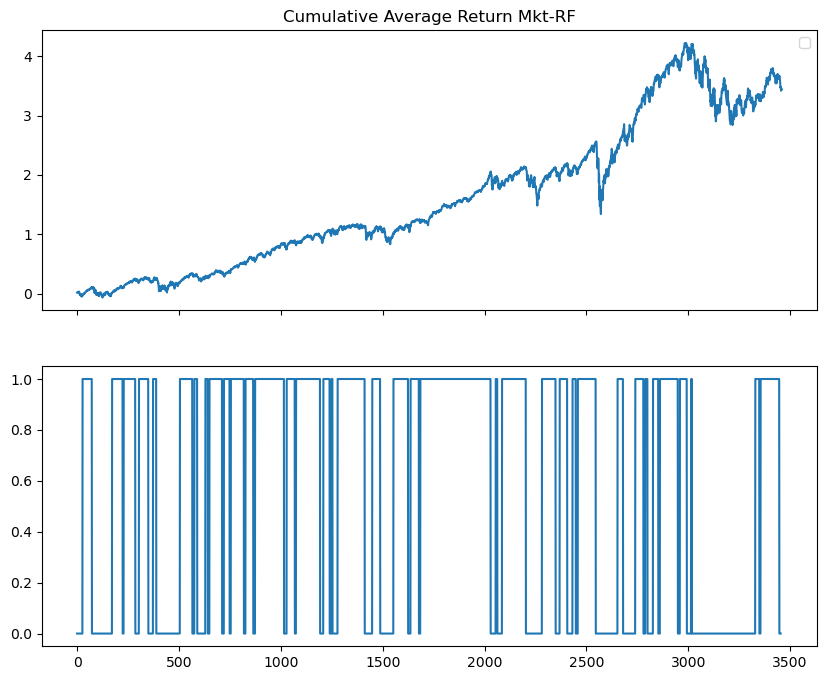

In [389]:
mkt_hmm_data = ema_df["Mkt-RF"].values

mkt_hmm, mkt_hmm_score = model_selection_hmm(mkt_hmm_data)

mkt_hmm_fig, mkt_hmm_axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

mkt_hmm_axs[0].plot(cum_return["Mkt-RF"].to_numpy())
mkt_hmm_axs[0].set_title("Cumulative Average Return Mkt-RF")
mkt_hmm_axs[0].legend()

mkt_hmm_axs[1].plot(mkt_hmm.predict(mkt_hmm_data))

#### Jump Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best penalty=0.0001')

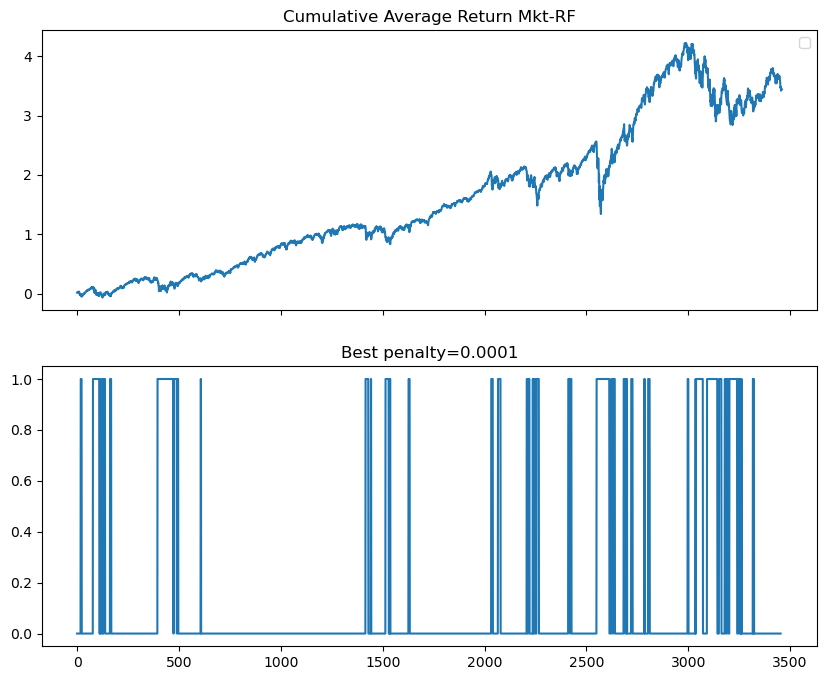

In [390]:
mkt_hmm_data = ema_df["Mkt-RF"].values

mkt_jm_states, mkt_jm_weights, mkt_jm_mu, mkt_jm_score, mkt_best_lamb = model_selection_jm(mkt_hmm_data, lambs, n_iter=5, N=2)

mkt_jm_fig, mkt_jm_axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

mkt_jm_axs[0].plot(cum_return["Mkt-RF"].to_numpy())
mkt_jm_axs[0].set_title("Cumulative Average Return Mkt-RF")
mkt_jm_axs[0].legend()

mkt_jm_axs[1].plot(mkt_jm_states)
mkt_jm_axs[1].set_title(f"Best penalty={mkt_best_lamb}")

Text(0.5, 1.0, 'Cumulative Average Return Mkt-RF')

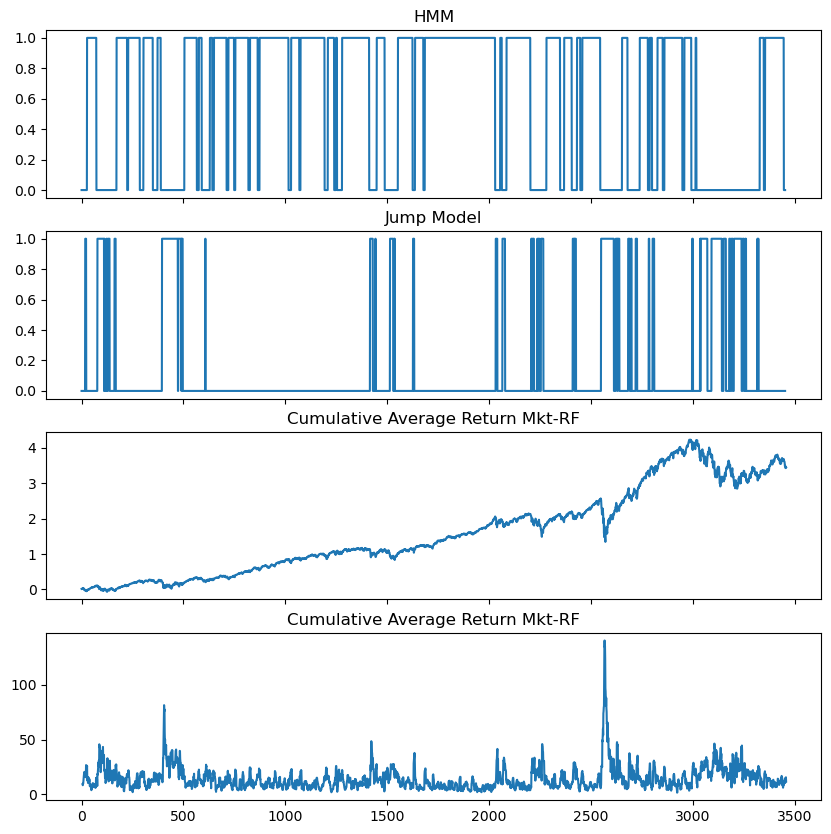

In [391]:
# Displaying in one figure is terrible, use subplots

mkt_fig, mkt_axs = plt.subplots(4,1,figsize=(10,10),sharex=True)

mkt_axs[0].plot(mkt_hmm.predict(mkt_hmm_data))
mkt_axs[0].set_title(f"HMM")

mkt_axs[1].plot(mkt_jm_states)
mkt_axs[1].set_title(f"Jump Model")

mkt_axs[2].plot(cum_return["Mkt-RF"].to_numpy())
mkt_axs[2].set_title("Cumulative Average Return Mkt-RF")

mkt_axs[3].plot(annualized_vol["Mkt-RF"].to_numpy())
mkt_axs[3].set_title("Cumulative Average Return Mkt-RF")

<font color='red'>
    
</font>

<font color='red'>
    - HMM: states of HMM seems to be fluctuating, without any apparent representation of volatilities and returns <br>
<br>
    - JM: states of JM seem to be correlated with volatilities, and states=1 represents high volatilities. Also, we will see below that for all factors except for SMB, Jump Model states always represent high volatilities. Therefore, it may work well as a refined jump indicator to detect regime switch of the market.
</font>

### SMB
#### hmm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


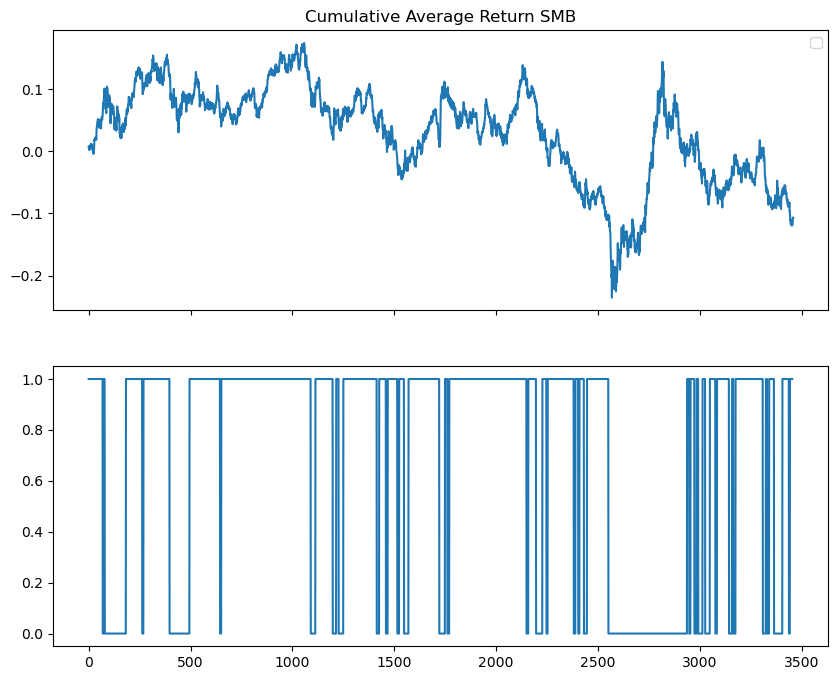

In [392]:
smb_hmm_data = ema_df["SMB"].values

smb_hmm, smb_hmm_score = model_selection_hmm(smb_hmm_data)

smb_hmm_fig, smb_hmm_axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

smb_hmm_axs[0].plot(cum_return["SMB"].to_numpy())
smb_hmm_axs[0].set_title("Cumulative Average Return SMB")
smb_hmm_axs[0].legend()

smb_hmm_axs[1].plot(smb_hmm.predict(smb_hmm_data))

#### Jump Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best penalty=0.001')

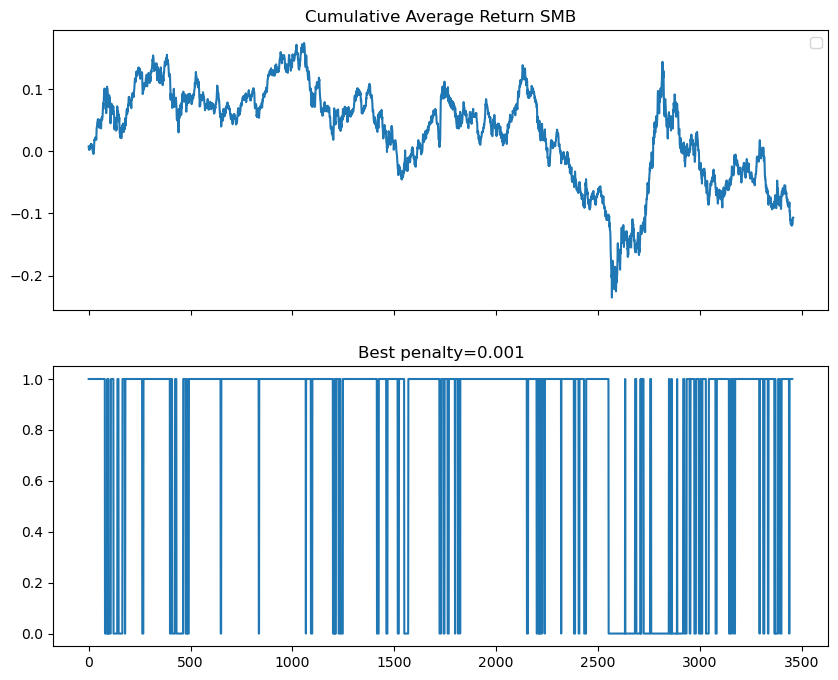

In [393]:
smb_hmm_data = ema_df["SMB"].values

smb_jm_states, smb_jm_weights, smb_jm_mu, smb_jm_score, smb_best_lamb = model_selection_jm(smb_hmm_data, lambs, n_iter=5, N=2)

smb_jm_fig, smb_jm_axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

smb_jm_axs[0].plot(cum_return["SMB"].to_numpy())
smb_jm_axs[0].set_title("Cumulative Average Return SMB")
smb_jm_axs[0].legend()

smb_jm_axs[1].plot(smb_jm_states)
smb_jm_axs[1].set_title(f"Best penalty={smb_best_lamb}")

Text(0.5, 1.0, 'Cumulative Average Return SMB')

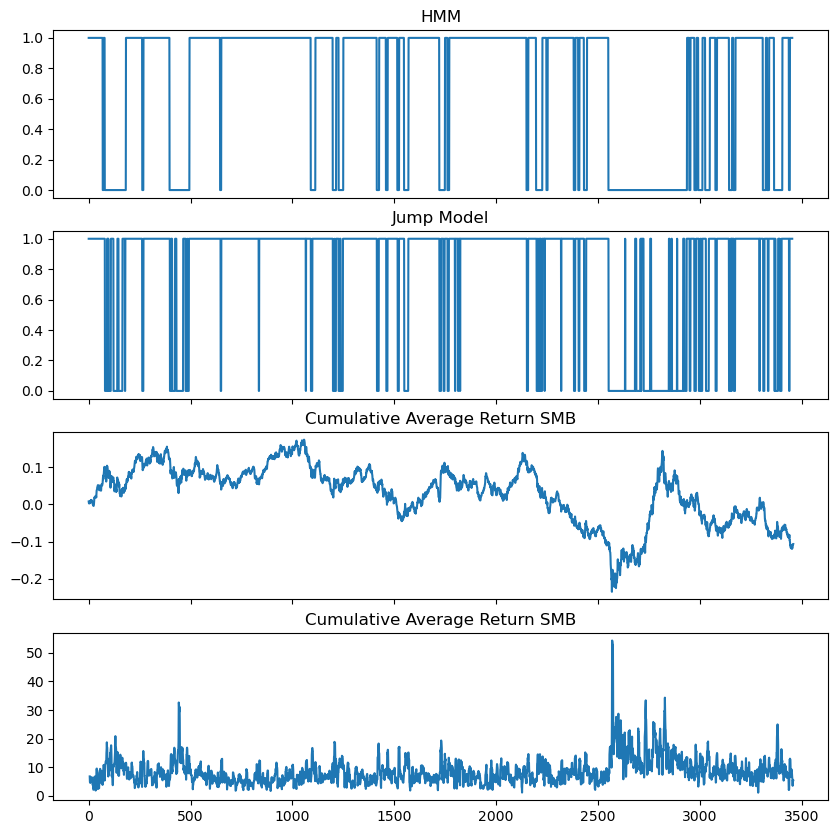

In [394]:
smb_fig, smb_axs = plt.subplots(4,1,figsize=(10,10),sharex=True)

smb_axs[0].plot(smb_hmm.predict(smb_hmm_data))
smb_axs[0].set_title(f"HMM")

smb_axs[1].plot(smb_jm_states)
smb_axs[1].set_title(f"Jump Model")

smb_axs[2].plot(cum_return["SMB"].to_numpy())
smb_axs[2].set_title("Cumulative Average Return SMB")

smb_axs[3].plot(annualized_vol["SMB"].to_numpy())
smb_axs[3].set_title("Cumulative Average Return SMB")

<font color='red'>
    - HMM: in the case of SMB, states of HMM is rather correlated with volatilities (still state=1 represents high volatilies)
<br>
<br>
    - JM: it is terrible in this case, with very unstable states.
</font>

### HML
#### hmm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


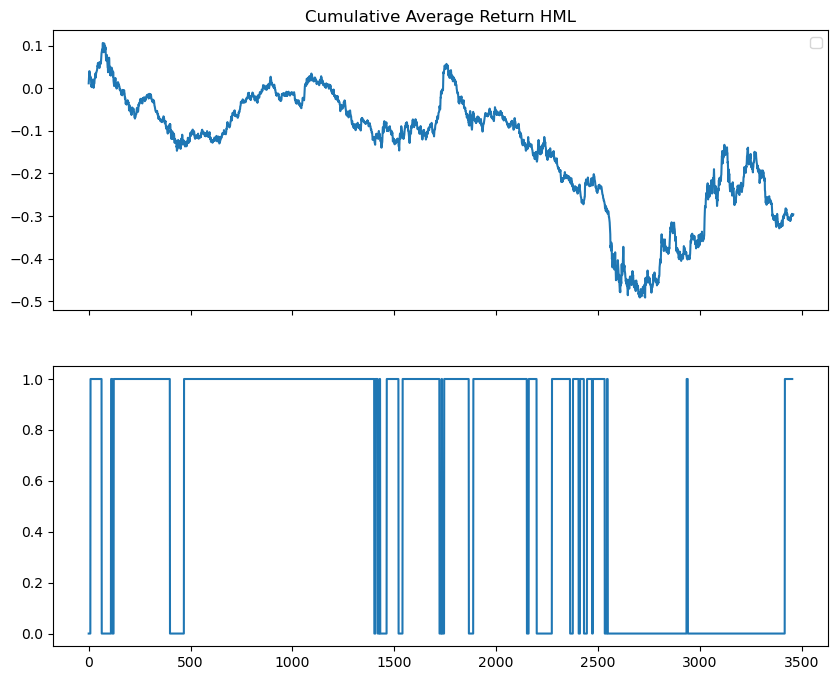

In [395]:
hml_hmm_data = ema_df["HML"].values

hml_hmm, hml_hmm_score = model_selection_hmm(hml_hmm_data)

hml_hmm_fig, hml_hmm_axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

hml_hmm_axs[0].plot(cum_return["HML"].to_numpy())
hml_hmm_axs[0].set_title("Cumulative Average Return HML")
hml_hmm_axs[0].legend()

hml_hmm_axs[1].plot(hml_hmm.predict(hml_hmm_data))

#### Jump Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best penalty=0.0001')

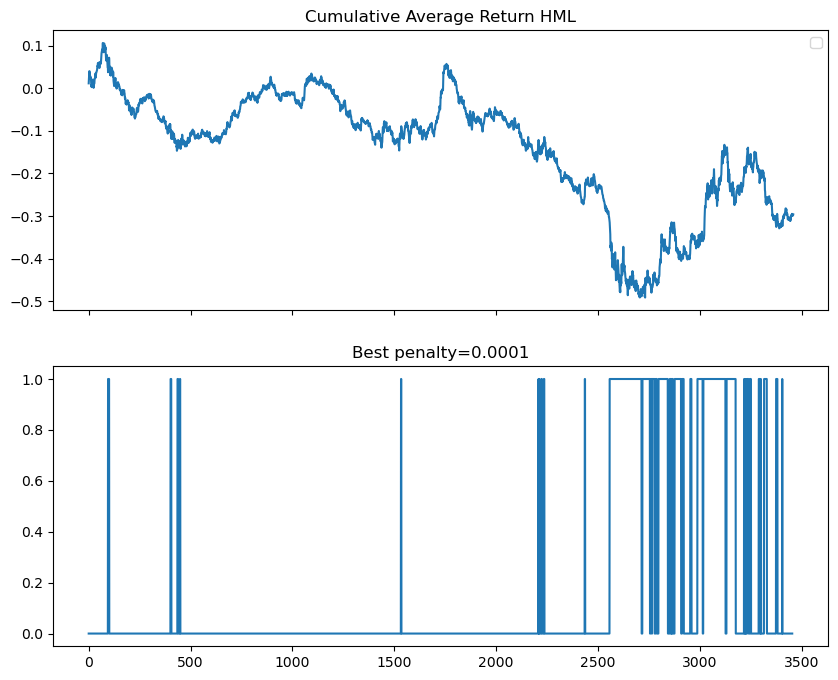

In [396]:
hml_hmm_data = ema_df["HML"].values

hml_jm_states, hml_jm_weights, hml_jm_mu, hml_jm_score, hml_best_lamb = model_selection_jm(hml_hmm_data, lambs, n_iter=5, N=2)

hml_jm_fig, hml_jm_axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

hml_jm_axs[0].plot(cum_return["HML"].to_numpy())
hml_jm_axs[0].set_title("Cumulative Average Return HML")
hml_jm_axs[0].legend()

hml_jm_axs[1].plot(hml_jm_states)
hml_jm_axs[1].set_title(f"Best penalty={hml_best_lamb}")

Text(0.5, 1.0, 'Cumulative Average Return HML')

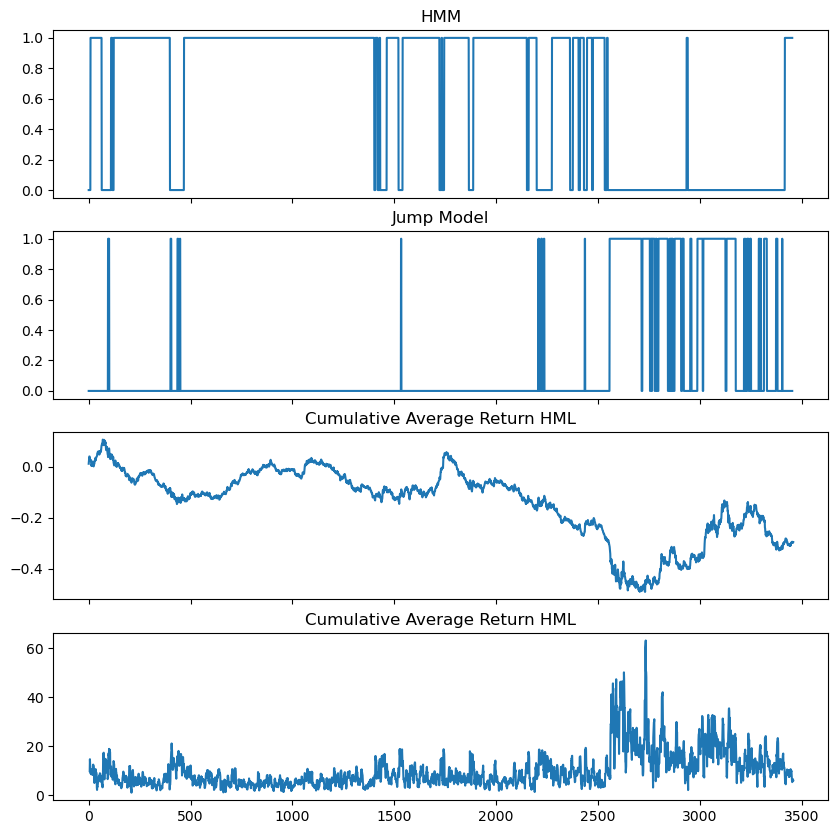

In [397]:
hml_fig, hml_axs = plt.subplots(4,1,figsize=(10,10),sharex=True)

hml_axs[0].plot(hml_hmm.predict(hml_hmm_data))
hml_axs[0].set_title(f"HMM")

hml_axs[1].plot(hml_jm_states)
hml_axs[1].set_title(f"Jump Model")

hml_axs[2].plot(cum_return["HML"].to_numpy())
hml_axs[2].set_title("Cumulative Average Return HML")

hml_axs[3].plot(annualized_vol["HML"].to_numpy())
hml_axs[3].set_title("Cumulative Average Return HML")

<font color='red'>
    - HMM: in this case HMM states=0 represents "canyons" of the return, which is the turning point from negative momentum to positive momentum. But states=1 represents "all the others", so we may need to use n_states > 2 to investigate closely.
<br>
<br>
    - JM: states of JM for HML, as stated before, is related to volatilities. However, in this case high volatilies result in also more volatile sequences, rather than a consistent state that represents high volatilities in other cases.
</font>

### RMW
#### hmm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


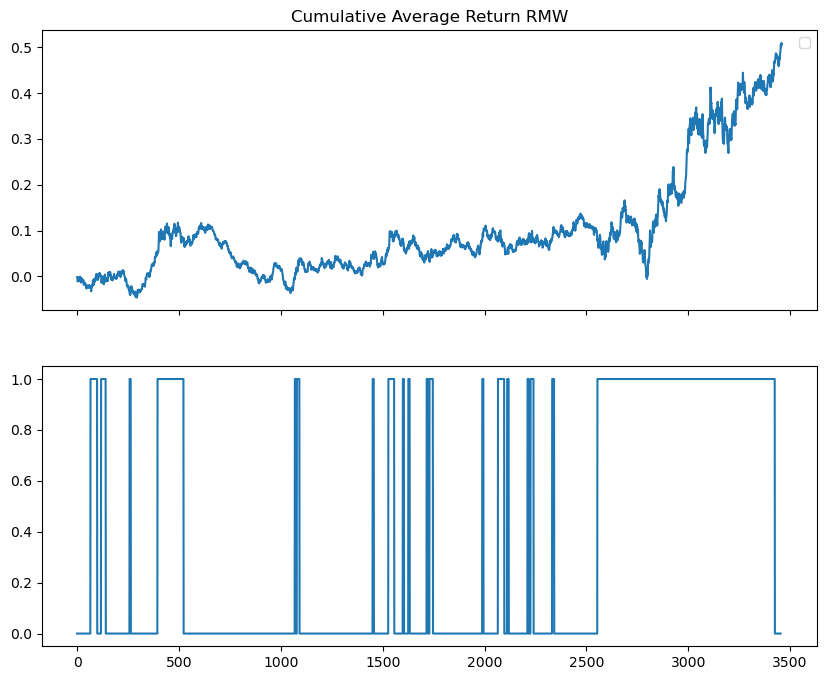

In [398]:
rmw_hmm_data = ema_df["RMW"].values

rmw_hmm, rmw_hmm_score = model_selection_hmm(rmw_hmm_data)

rmw_hmm_fig, rmw_hmm_axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

rmw_hmm_axs[0].plot(cum_return["RMW"].to_numpy())
rmw_hmm_axs[0].set_title("Cumulative Average Return RMW")
rmw_hmm_axs[0].legend()

rmw_hmm_axs[1].plot(rmw_hmm.predict(rmw_hmm_data))

#### Jump Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best penalty=0.001')

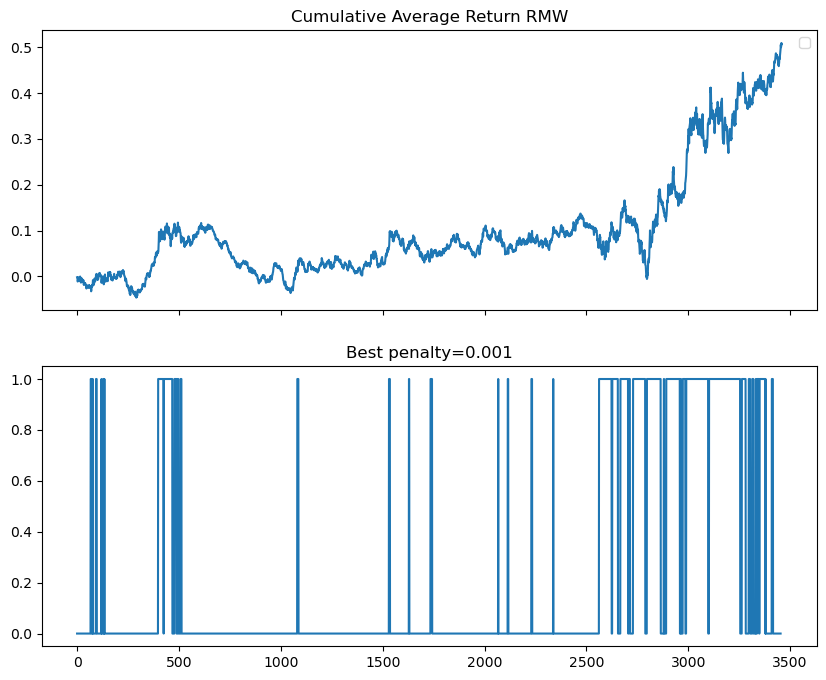

In [399]:
rmw_hmm_data = ema_df["RMW"].values

rmw_jm_states, rmw_jm_weights, rmw_jm_mu, rmw_jm_score, rmw_best_lamb = model_selection_jm(rmw_hmm_data, lambs, n_iter=5, N=2)

rmw_jm_fig, rmw_jm_axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

rmw_jm_axs[0].plot(cum_return["RMW"].to_numpy())
rmw_jm_axs[0].set_title("Cumulative Average Return RMW")
rmw_jm_axs[0].legend()

rmw_jm_axs[1].plot(rmw_jm_states)
rmw_jm_axs[1].set_title(f"Best penalty={rmw_best_lamb}")

Text(0.5, 1.0, 'Cumulative Average Return RMW')

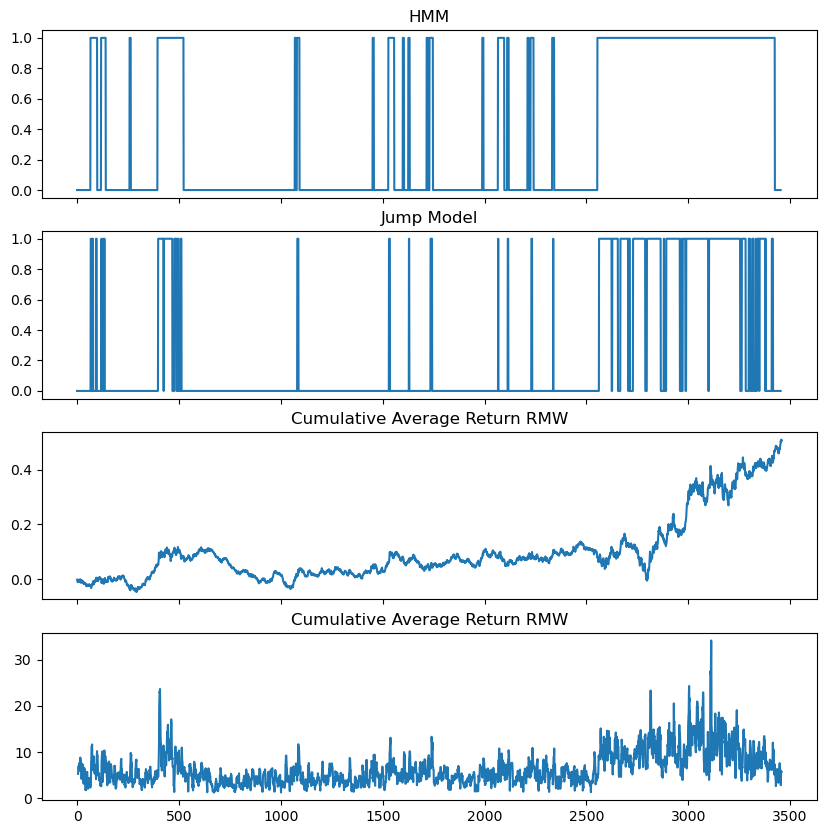

In [400]:
rmw_fig, rmw_axs = plt.subplots(4,1,figsize=(10,10),sharex=True)

rmw_axs[0].plot(rmw_hmm.predict(rmw_hmm_data))
rmw_axs[0].set_title(f"HMM")

rmw_axs[1].plot(rmw_jm_states)
rmw_axs[1].set_title(f"Jump Model")

rmw_axs[2].plot(cum_return["RMW"].to_numpy())
rmw_axs[2].set_title("Cumulative Average Return RMW")

rmw_axs[3].plot(annualized_vol["RMW"].to_numpy())
rmw_axs[3].set_title("Cumulative Average Return RMW")

<font color='red'>
    RWM is similar to HML, where HMM states is related to volatilities, and higher volatilities result in volatile state sequences for JM.
</font>

### CMA
#### hmm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


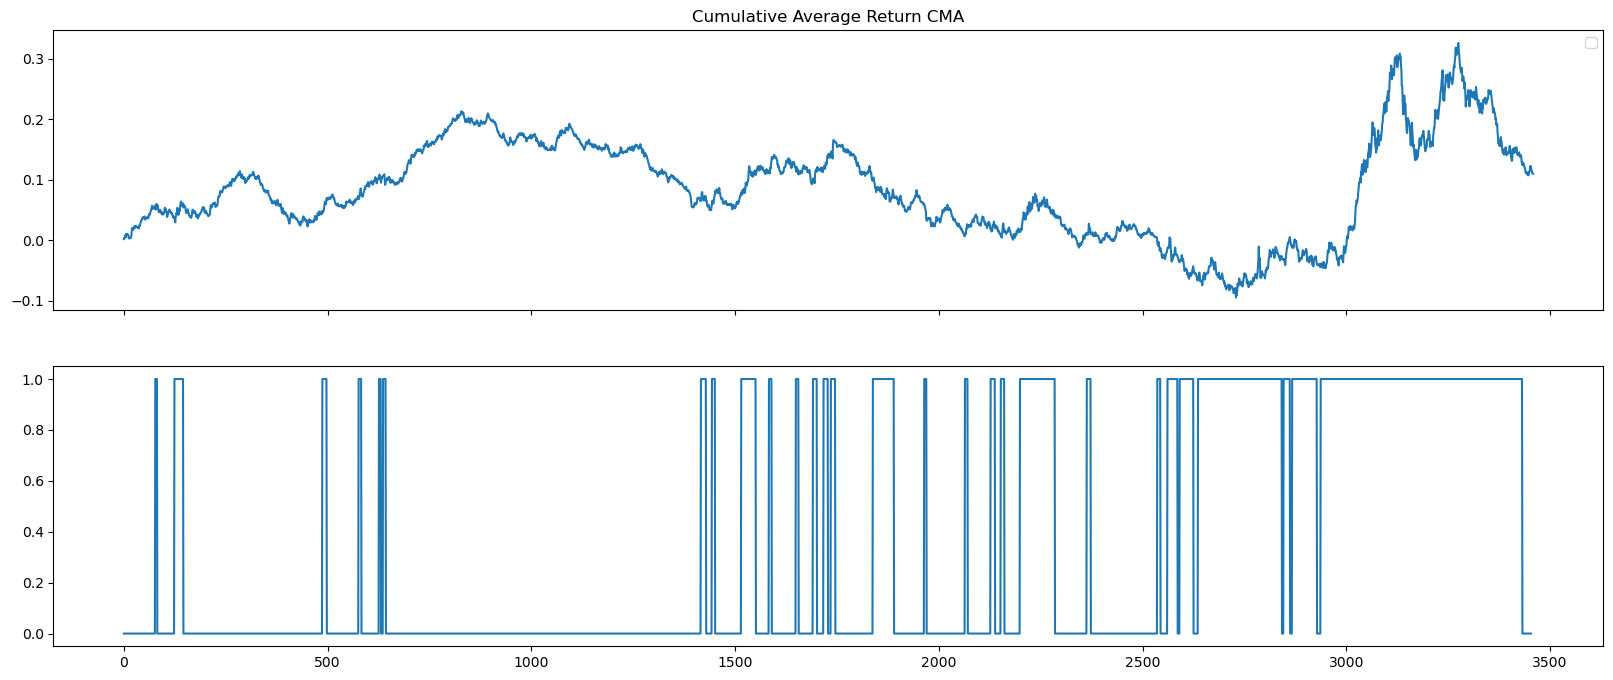

In [425]:
cma_hmm_data = ema_df["CMA"].values

cma_hmm, cma_hmm_score = model_selection_hmm(cma_hmm_data)

cma_hmm_fig, cma_hmm_axs = plt.subplots(2,1,figsize=(20,8),sharex=True)

cma_hmm_axs[0].plot(cum_return["CMA"].to_numpy())
cma_hmm_axs[0].set_title("Cumulative Average Return CMA")
cma_hmm_axs[0].legend()

cma_hmm_axs[1].plot(cma_hmm.predict(cma_hmm_data))

#### Jump Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best penalty=1e-05')

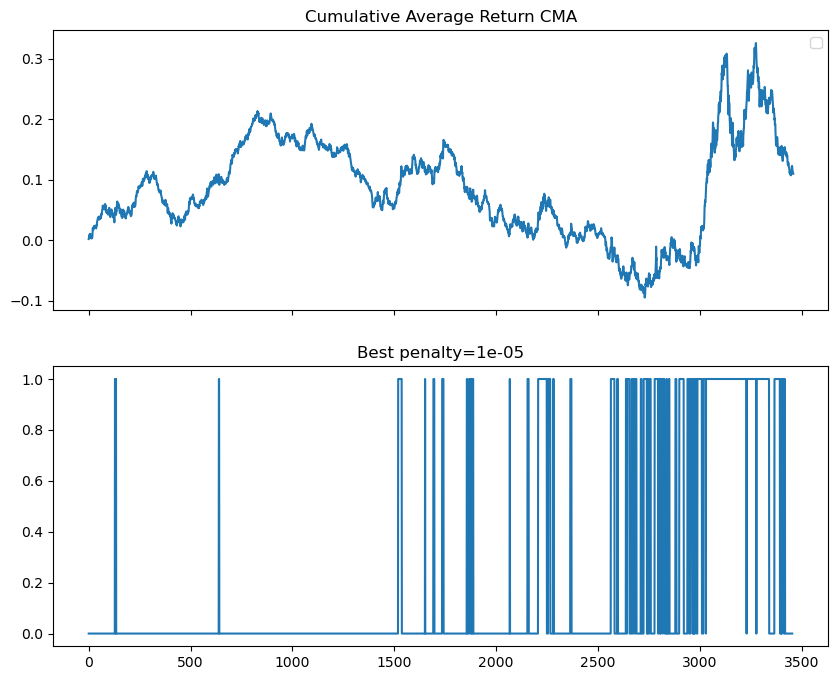

In [402]:
cma_hmm_data = ema_df["CMA"].values

cma_jm_states, cma_jm_weights, cma_jm_mu, cma_jm_score, cma_best_lamb = model_selection_jm(cma_hmm_data, lambs, n_iter=5, N=2)

cma_jm_fig, cma_jm_axs = plt.subplots(2,1,figsize=(10,8),sharex=True)

cma_jm_axs[0].plot(cum_return["CMA"].to_numpy())
cma_jm_axs[0].set_title("Cumulative Average Return CMA")
cma_jm_axs[0].legend()

cma_jm_axs[1].plot(cma_jm_states)
cma_jm_axs[1].set_title(f"Best penalty={cma_best_lamb}")

Text(0.5, 1.0, 'Cumulative Average Return CMA')

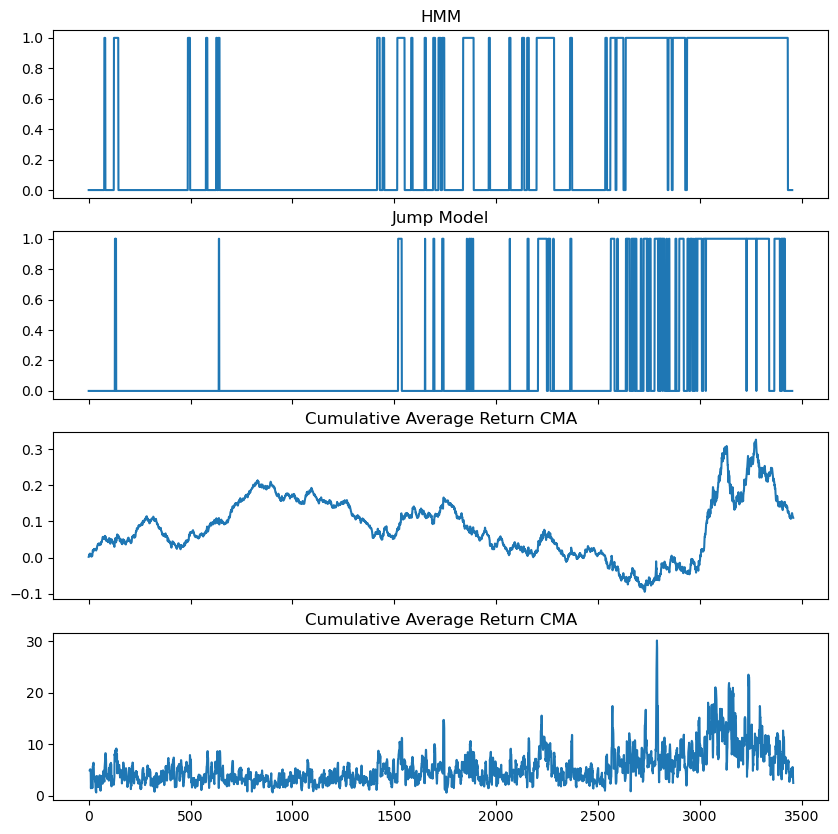

In [403]:
cma_fig, cma_axs = plt.subplots(4,1,figsize=(10,10),sharex=True)

cma_axs[0].plot(cma_hmm.predict(cma_hmm_data))
cma_axs[0].set_title(f"HMM")

cma_axs[1].plot(cma_jm_states)
cma_axs[1].set_title(f"Jump Model")

cma_axs[2].plot(cum_return["CMA"].to_numpy())
cma_axs[2].set_title("Cumulative Average Return CMA")

cma_axs[3].plot(annualized_vol["CMA"].to_numpy())
cma_axs[3].set_title("Cumulative Average Return CMA")

<font color='red'>
    - HMM: states=1 represents stable (and a little negative) momentum, while states=0 represents high positive momentum. Therefore we may assume that HMM states are related to strength and directions of mementum, and we need more n_states to approximate in this case.
<br>
<br>
    - JM: JM states in this case is similar to HMM states, but it seems to only consider about the strength of momentum
</font>

#### Summary:

- **Generally the performance of HMM state sequences and JM sequences are similar, but HMM is more related to the direction of momentum of returns while JM is related to volatilities, and therefore JM sequences are in most cases more volatile and denote state transition when high volatilities appear.**

- **Also, in all cases we seem to need more n_states, as the current one is underfitting (with only volatilities being the feature too influential for JM).**

**f. (Extra credit) Based on your results above, propose and test a trading strategy for each of the factors. Daily, each strategy should decide whether to go long one unit of the factor or not to hold it (i.e., hold zero units of the factor).**

Important:

- Make sure each strategy is deployed out-of-sample. In other words, you can only use information available to you before the day you make each trade decision.
- For each factor, use the long-only strategy as a benchmark. Compare the performance of your trading strategy in each of the factors with the long-only strategy in the factor. Does your strategy outperform? Compute its annualized average return, annualized volatility, annualized Sharpe ratio, and annualized $\alpha$ and $\beta$ relative to the benchmark strategy.

Strategy: go long on a factor when the model predicts a state associated with positive returns and stay out when a state associated with negative returns is predicted.

In [405]:
import pandas as pd
import numpy as np

# Assuming 'factor_returns' is a pandas DataFrame with daily returns for each factor
# And 'predicted_states' is a Series or array with the predicted state for each day (0 or 1)
# where state 1 is considered to be the 'positive return' state
factor_returns = df  # replace with your actual data
predicted_states = cma_jm_states   # replace with your actual predicted states

# Initialize a Series to hold your strategy's position (1 for long, 0 for out)
positions = pd.Series(index=factor_returns.index, data=0)

# Go long on days where the predicted state is 1
positions[predicted_states == 1] = 1

# Calculate the daily strategy return
strategy_returns = positions.shift(1) * factor_returns  # shift positions because you decide based on the previous day's state

# Calculate cumulative returns for the strategy
cumulative_returns = (1 + strategy_returns).cumprod()

# Evaluate performance metrics
annualized_return = strategy_returns.mean() * 252
annualized_volatility = strategy_returns.std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

# Assume risk_free_rate is the annual risk-free rate
risk_free_rate = 0.01
excess_returns = strategy_returns - risk_free_rate / 252
sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)

# Calculate alpha and beta relative to the market (assuming 'market_returns' is the benchmark)
# You can use a regression here for simplicity, but in practice, you might want to use a more sophisticated method
import statsmodels.api as sm
market_returns = df['Mkt-RF']  # replace with market returns data
X = sm.add_constant(market_returns)  # add a constant term for the intercept
model = sm.OLS(strategy_returns, X).fit()
alpha = model.params['const']
beta = model.params['market_returns']

print(f"Annualized Return: {annualized_return}")
print(f"Annualized Volatility: {annualized_volatility}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")


IndexError: Boolean index has wrong length: 3454 instead of 3459